### Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.decomposition import PCA

### Load Dataset

In [ ]:
df = pd.read_csv('marketing_campaign_data.csv')

## Task 1 : Conversion Rate Analysis Based On Income, Spending And Age
Work Stages:


1.   Feature engineering: conversion rate
2.   Calculate and categorize 'age' into several groups
3.   Create a plot that shows the relationship between conversion rate and user types likely to respond more to campaigns
4.   Interpret the plot and observe if there is a significant relationship between customer age and conversion rate

### Data Preprocessing

In [ ]:
# Display the first 5 rows
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# Display the information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [ ]:
# check the amount of unique value
print("Unique Value Information")
df.nunique()

Unique Value Information


Unnamed: 0             2240
ID                     2240
Year_Birth               59
Education                 5
Marital_Status            6
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntCoke                 776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [ ]:
# Check the amount of unique value for object datatypes
df.select_dtypes(include='object').nunique()

Education           5
Marital_Status      6
Dt_Customer       663
dtype: int64

In [ ]:
# Check the description of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2240.0,1.119500e+03,6.467766e+02,0.0,559.75,1119.5,1679.25,2239.0
ID,2240.0,5.592160e+03,3.246662e+03,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1.968806e+03,1.198407e+01,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,5.224725e+07,2.517308e+07,1730000.0,35303000.00,51381500.0,68522000.00,666666000.0
Kidhome,2240.0,4.441964e-01,5.383981e-01,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,5.062500e-01,5.445382e-01,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,4.910938e+01,2.896245e+01,0.0,24.00,49.0,74.00,99.0
MntCoke,2240.0,3.039357e+05,3.365974e+05,0.0,23750.00,173500.0,504250.00,1493000.0
MntFruits,2240.0,2.630223e+04,3.977343e+04,0.0,1000.00,8000.0,33000.00,199000.0
MntMeatProducts,2240.0,1.669500e+05,2.257154e+05,0.0,16000.00,67000.0,232000.00,1725000.0


Certainly, here are the key points that will influence the data preprocessing steps, including the considerations around the Unnamed: 0 column:



1.   Missing Values:
      *   The count row in the summary indicates that some columns, such as Income, have fewer non-null values compared to the total number of rows (2,240).
      *   This suggests the need to investigate and handle missing values in the dataset during the data preprocessing stage


2.   Data Types:
      *   The dataset contains both numeric and categorical variables.
      *   The preprocessing stage should ensure that the data types are correctly assigned for each column, as this will affect the choice of appropriate analysis techniques.

3.   Outliers
      *   The wide range of values in columns like `Income`, `MntCoke`, `MntMeatProducts`, etc. indicates the potential presence of outliers.
      *   Outlier detection and handling will be a crucial step in the data preprocessing phase to ensure the reliability of subsequent analyses.

4.   Normalized/Standardized Features:
      *   The different scales of the numeric features (e.g., Income vs. Recency) may require normalization or standardization to ensure they are on a similar scale.
      *   This will be important for algorithms that are sensitive to feature scales, such as distance-based models or gradient-based optimization techniques.

5.   Handling the '`Unnamed`: 0' Column:
      *   The '`Unnamed`: 0' column appears to be an index column that is automatically provided by the Pandas DataFrame.
      *   This column can be dropped during the preprocessing stage Removing this column will make the dataset cleaner and more focused on the features that are truly relevant for further analysis.














### Feature Engineering

In [ ]:
# Create a copy of the original dataframe to avoid modifying the original data
dfg = df.copy()

# Calculate the age of each customer based on their year of birth
dfg['Age'] = 2024 - dfg['Year_Birth']

# Categorize customers into three age groups based on their age
def segment_age(x):
    if x < 18:
        return None  # or any placeholder you prefer, like np.nan
    elif x < 40 :
        return 'Young Adults'
    elif x < 60 :
        return 'Middle-aged Adults'
    else:
        return 'Old Adults'

dfg['AgeSegment'] = dfg['Age'].apply(lambda x: segment_age(x))

# Add a new 'HasParent' column to the DataFrame to indicate whether a customer is a parent or not
dfg['HasParent'] = dfg.apply(lambda row: 'yes' if row['Kidhome'] > 0 or row['Teenhome'] > 0 else 'no', axis=1)

# Calculate the total number of children each customer has
dfg['NumChildren'] = dfg['Kidhome'] + dfg['Teenhome']

# Calculate the total number of campaigns each customer accepted
dfg['TotalAccCmp'] = dfg['AcceptedCmp1'] + dfg['AcceptedCmp2'] + dfg['AcceptedCmp3'] + dfg['AcceptedCmp4'] + dfg['AcceptedCmp5']

# Calculate the total spending of each customer across all product categories
dfg['TotalSpent'] = dfg['MntCoke'] + dfg['MntFruits'] + dfg['MntMeatProducts'] + dfg['MntFishProducts'] + dfg['MntSweetProducts'] + dfg['MntGoldProds']

# Calculate the total number of transactions each customer made
dfg['TotalPurchases'] = dfg['NumDealsPurchases'] + dfg['NumWebPurchases'] + dfg['NumCatalogPurchases'] + dfg['NumStorePurchases']

# Calculate the conversion rate for each customer (the number of web purchases divided by the number of web visits)
dfg['ConversionRate'] = dfg['NumWebPurchases'] / dfg['NumWebVisitsMonth']

The explanation of each new features:


1.   **Age**: Provides demographic insight into customer age, influencing purchasing behaviors and marketing strategies.
2.   **AgeSegment**: Categorizes customers into 'Young Adults', 'Middle-aged Adults', and 'Old Adults' for targeted marketing and behavior analysis.
3.   **HasParent**: Indicates if a customer is a parent, crucial for understanding family-related purchasing decisions.
4.   **NumChildren**: Quantifies the number of children each customer has, influencing household spending patterns.
5.   **TotalAccCmp**: Counts accepted marketing campaigns, reflecting customer engagement and responsiveness.
6.   **TotalSpent**:  Sum of customer spending across product categories, indicating overall customer value.
7.   **TotalPurchases**: Total transactions made by each customer, showing purchasing frequency and loyalty.
8.   **ConversionRate**: Ratio of web purchases to web visits, measuring online sales effectiveness and customer engagement.




### Exploratory Data Analysis

##### Nums Variable

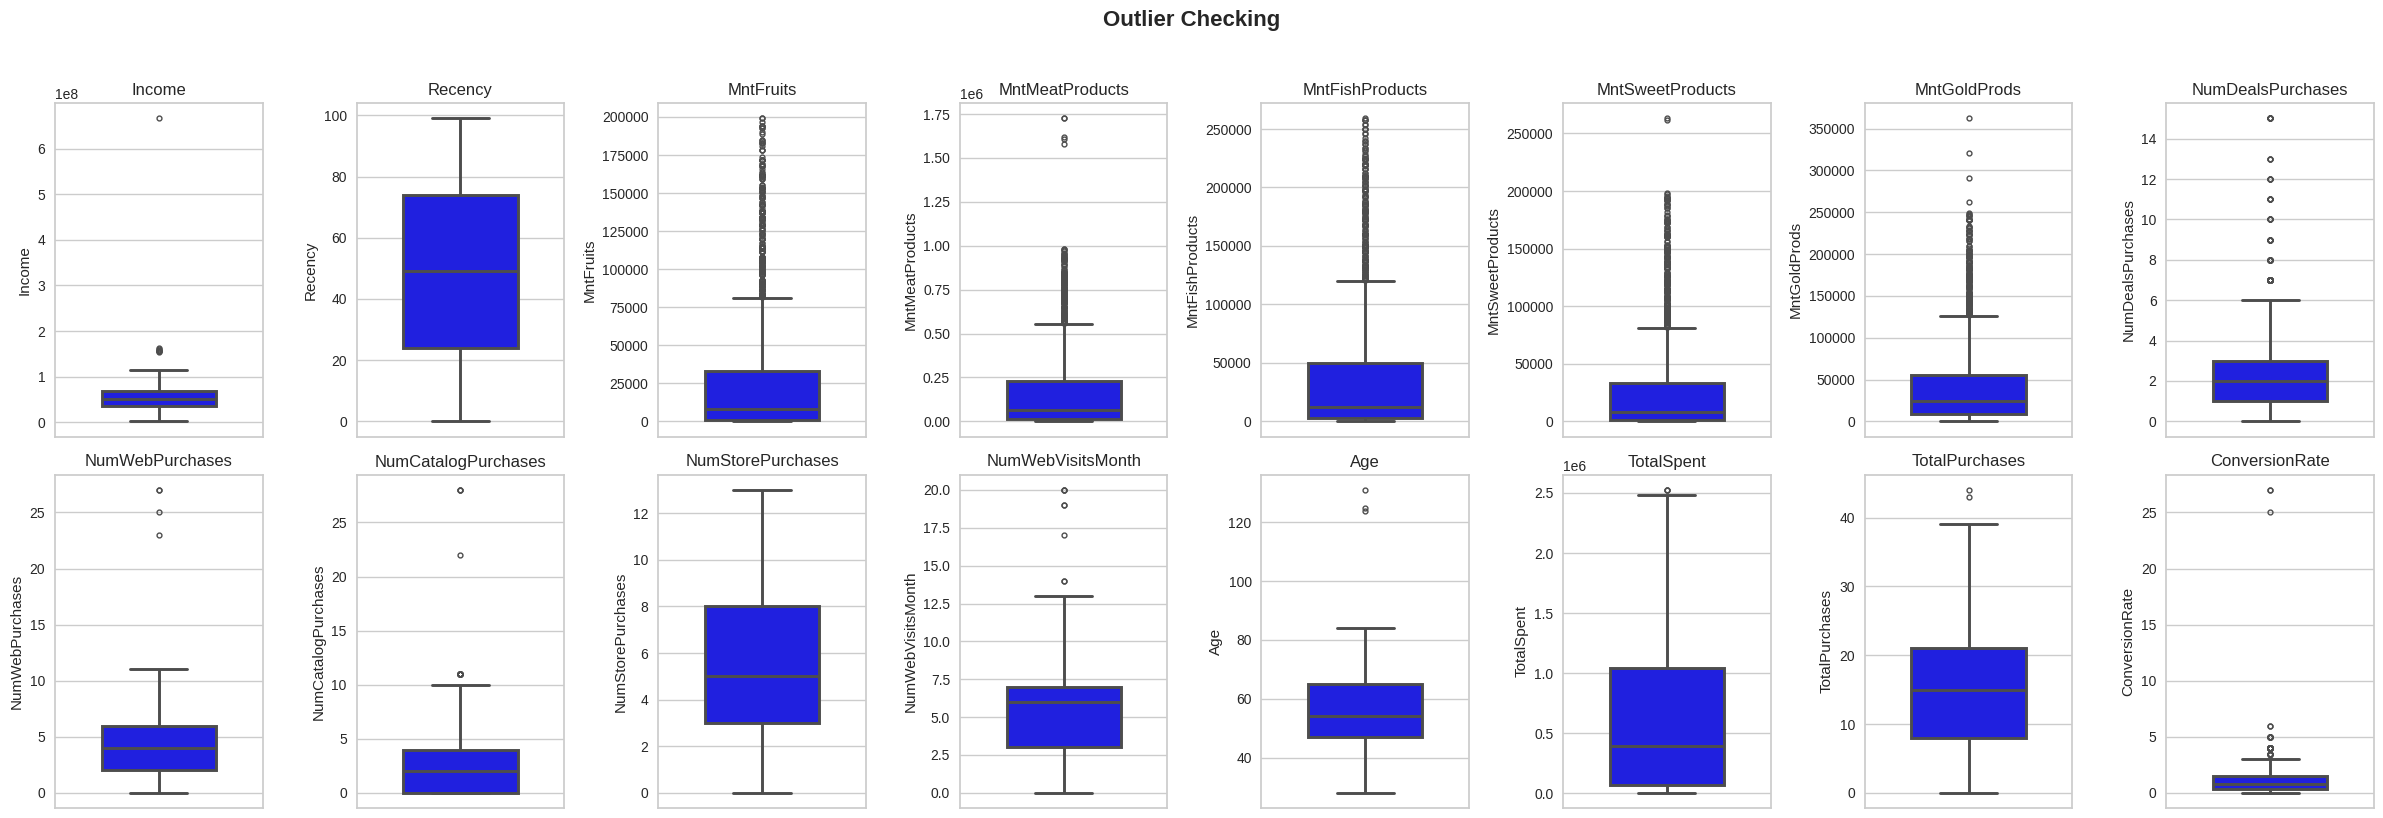

In [ ]:
# List of numerical variables to plot
nums = [
    'Income', 'Recency', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age',
    'TotalSpent', 'TotalPurchases', 'ConversionRate'
]

fig, axes = plt.subplots(2, 8, figsize=(24, 8))
fig.suptitle('Outlier Checking', fontsize=16, fontweight='bold', y=1.02)
axes = axes.flatten()

for i, var in enumerate(nums):
    sns.boxplot(y=dfg[var], ax=axes[i], color='blue', linewidth=2.1, width=0.55, fliersize=3.5)
    axes[i].set_title(var)

plt.tight_layout()
plt.show()

Based on the visual analysis, the image shows that there are several data points that are very different or extreme compared to the majority of the other data. The outliers identified include variables such as:
1. `Income` - The income value is far above the distribution of the other data, making it an outlier that deviates from the general distribution.
2. `MntMeatProducts` - The value of this variable appears to be very high compared to the distribution of the other data.
3. `MntSweetProducts` - Similar to MntMeatProducts, the value of this variable also appears to be very prominent from the overall data distribution.
4. `MntGoldProds` - This variable shows a value that is far outside the normal range of the other data.
5. `NumDealsPurchases` - The number of purchases through deals/vouchers is very high, making it an outlier in the distribution.
6. `NumWebPurchases` - The number of web purchases is very prominent compared to the other data.
7. `NumCatalogPurchases` - The number of catalog purchases is much higher compared to the general distribution.
8. `NumWebVisitsMonth` - The monthly website visit frequency is very high compared to the other data.
9. `Age` - The age value appears to be very deviant from the overall age distribution.
10. `TotalSpent` - The total expenditure is very high, exceeding the distribution of the other data.
11. `ConversionRate` - The conversion rate appears to be much higher compared to the other data.

The presence of outliers like these needs to be analyzed further to understand the causes and consider appropriate handling, such as data transformation or removal if necessary. This is important so that the analysis and models generated are not distorted by the extreme data points.




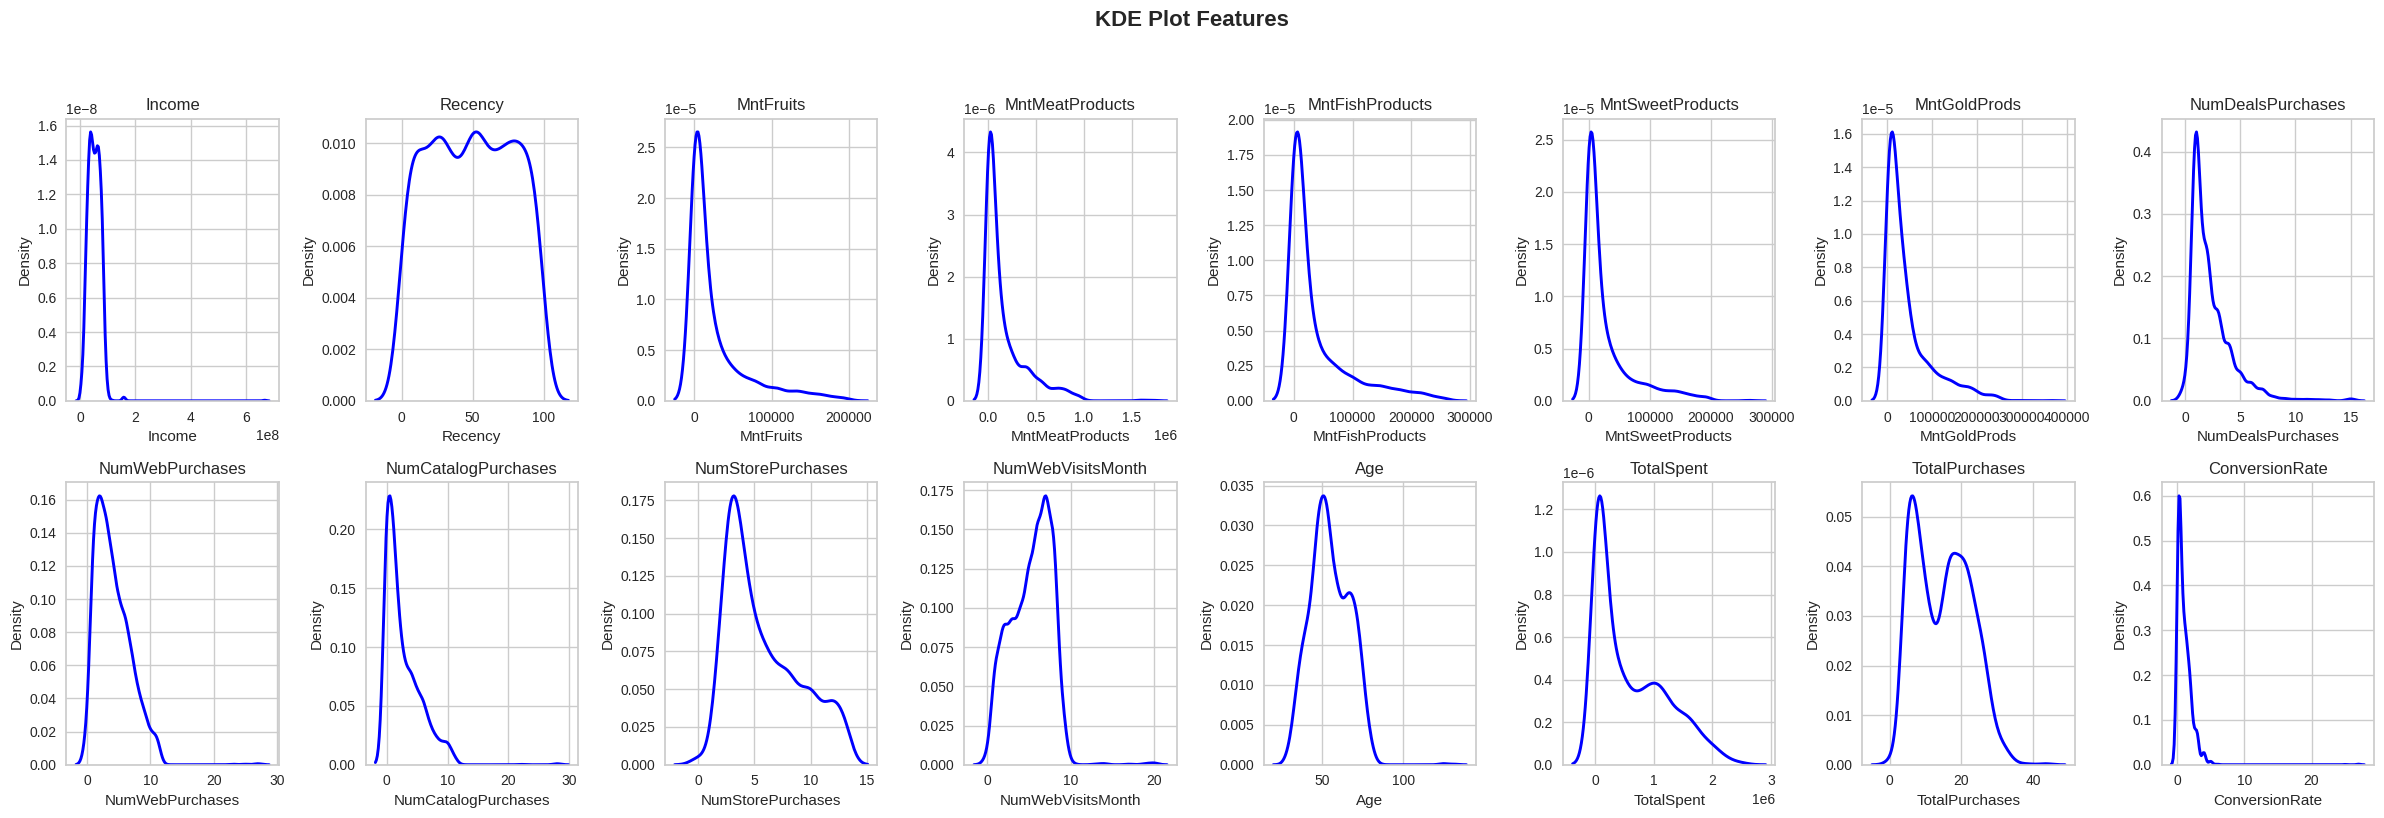

In [ ]:
# List of numerical variables to plot
nums = [
    'Income', 'Recency', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age',
    'TotalSpent', 'TotalPurchases', 'ConversionRate'
]

fig, axes = plt.subplots(2, 8, figsize=(24, 8))
fig.suptitle('KDE Plot Features', fontsize=16, fontweight='bold', y=1.02)
axes = axes.flatten()

for i, var in enumerate(nums):
    sns.kdeplot(data=dfg, x=var, ax=axes[i], color='blue', linewidth=2.1)
    axes[i].set_title(var)

plt.tight_layout()
plt.show()

Based on the detailed analysis of the KDE plot, here is a summary of the key observations:
1. `Income` Distribution:
  * This variable shows the distribution of customer incomes.
  * The right-skewed distribution with a long tail indicates the presence of a segment of high-income customers.
  * This suggests opportunities to target and cater to the preferences of this affluent segment.
2. `Recency` Distribution:
  * This variable depicts the distribution of customer purchase recency.
  * The bimodal shape of the distribution suggests the existence of two distinct customer segments based on their time since last purchase.
  * Understanding this segmentation can help develop targeted retention and reactivation strategies.
3. `Product Category` Spending:
  * Variables like `MntFruits`, `MntMeatProducts`, and `MntFishProducts` show the distribution of spending across product categories.
  * The right-skewed distributions indicate that only a small group of customers is responsible for a significant portion of the spending in these categories.
  * Exploring the factors driving this high-spending behavior can inform product development and marketing decisions.
4. Gold `Product Purchase`s:
  * The `NumGoldProds` variable represents the distribution of gold product purchases by customers.
  * The concentrated distribution with a long tail suggests that while most customers do not buy gold products, there is a small segment that does.
  * Investigating the motivations and preferences of this gold product buyer segment can provide insights for product development and positioning.
5. `Deal-Based Purchases`:
  * The `NumDealsPurchases` variable depicts the distribution of deal-based purchases by customers.
  * The right-skewed distribution indicates the presence of a segment of customers who engage in a significantly higher number of deal-based purchases.
  * Understanding and catering to the needs of this deal-seeking segment can enhance customer loyalty and drive sales.
6. `Age` Distribution:
  * This variable shows the distribution of customer ages.
  * The relatively balanced distribution suggests opportunities to analyze how customer preferences and purchase patterns evolve over the customer lifecycle.

Overall, a deep dive into each variable in the KDE plot can provide valuable insights into the heterogeneity of the customer base, the presence of outliers and distinct segments, and the potential relationships between customer characteristics and their purchase behavior

##### Cats Variable

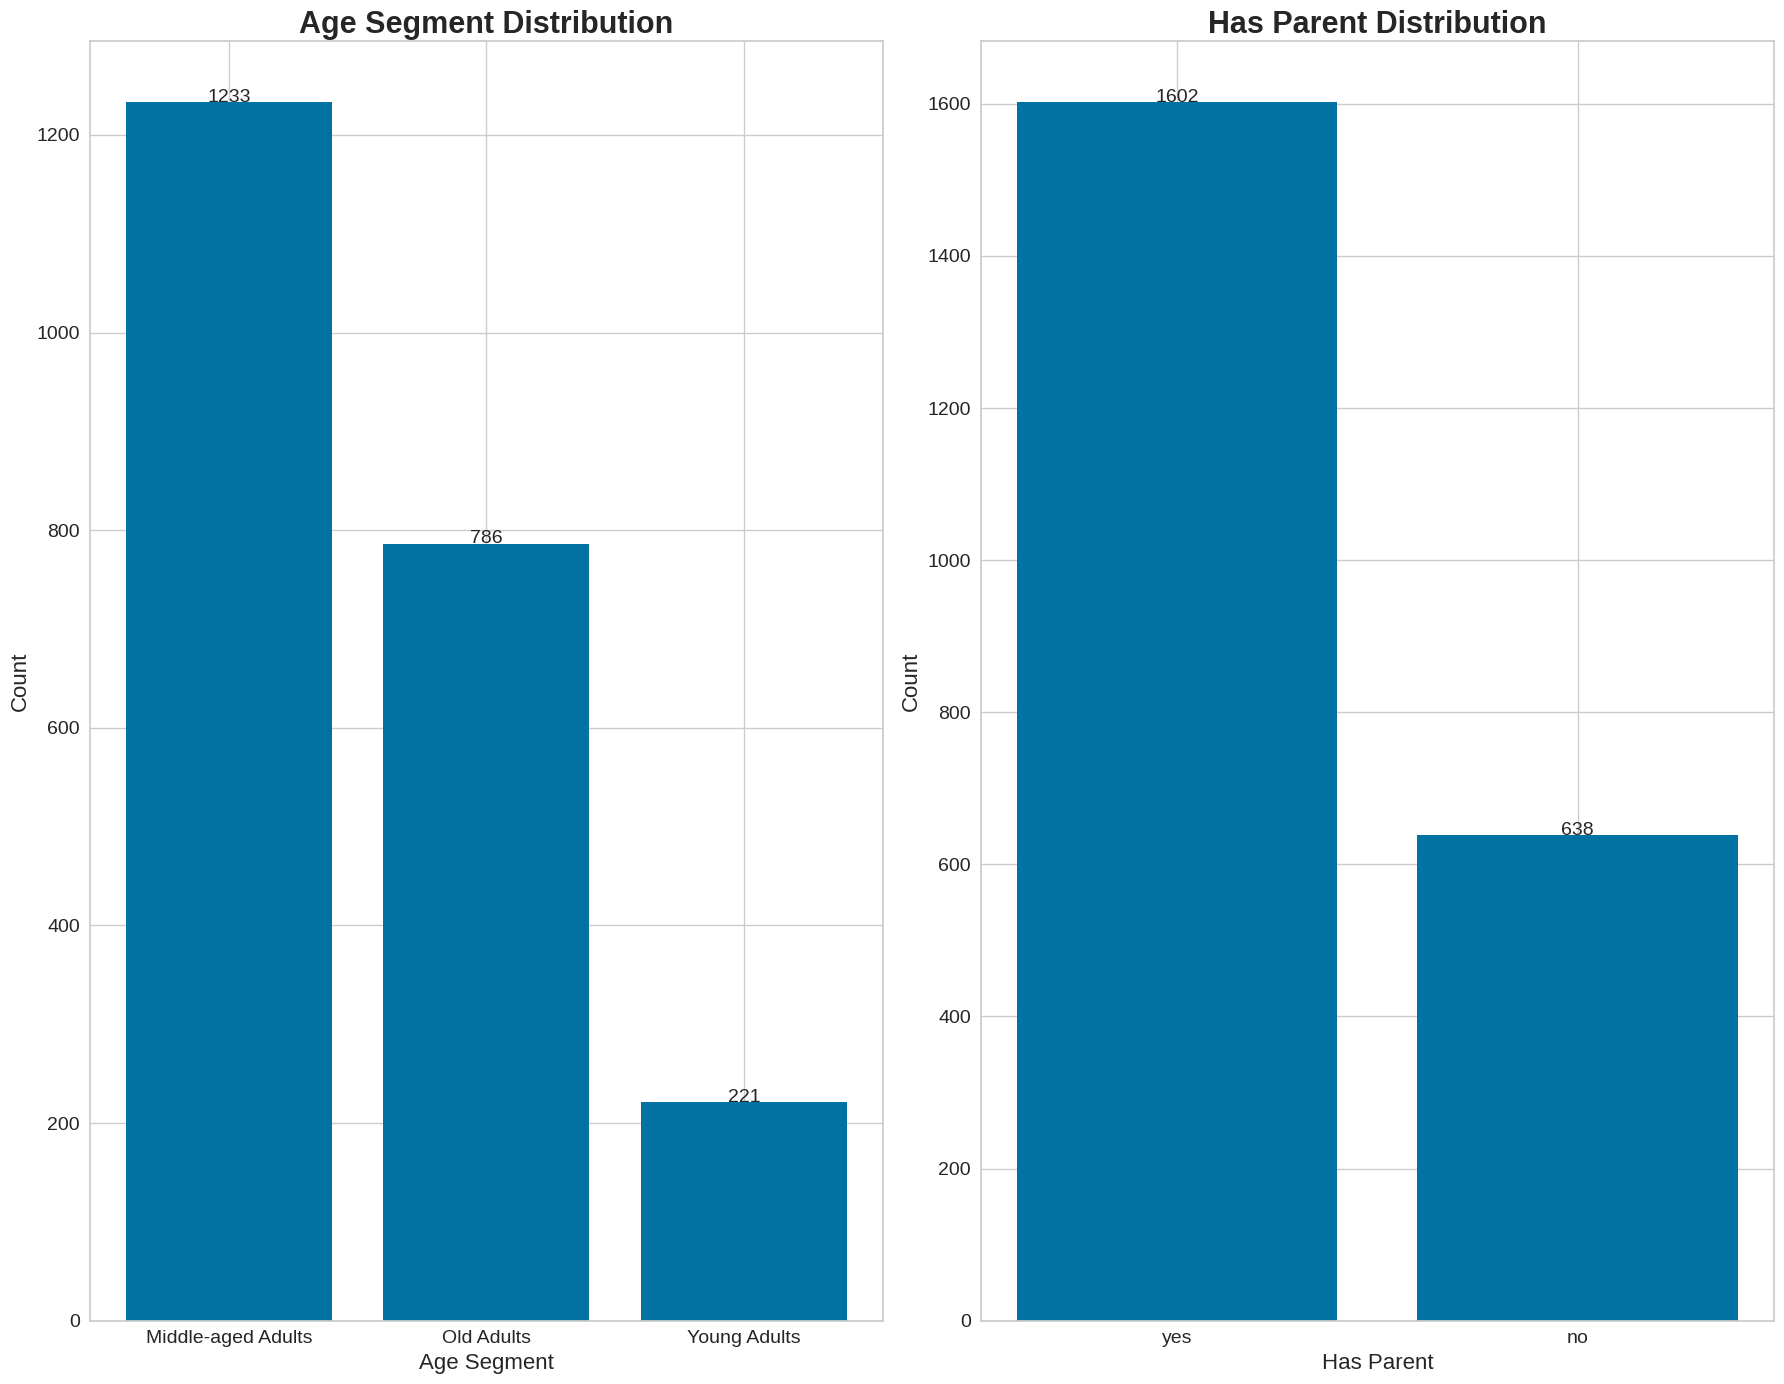

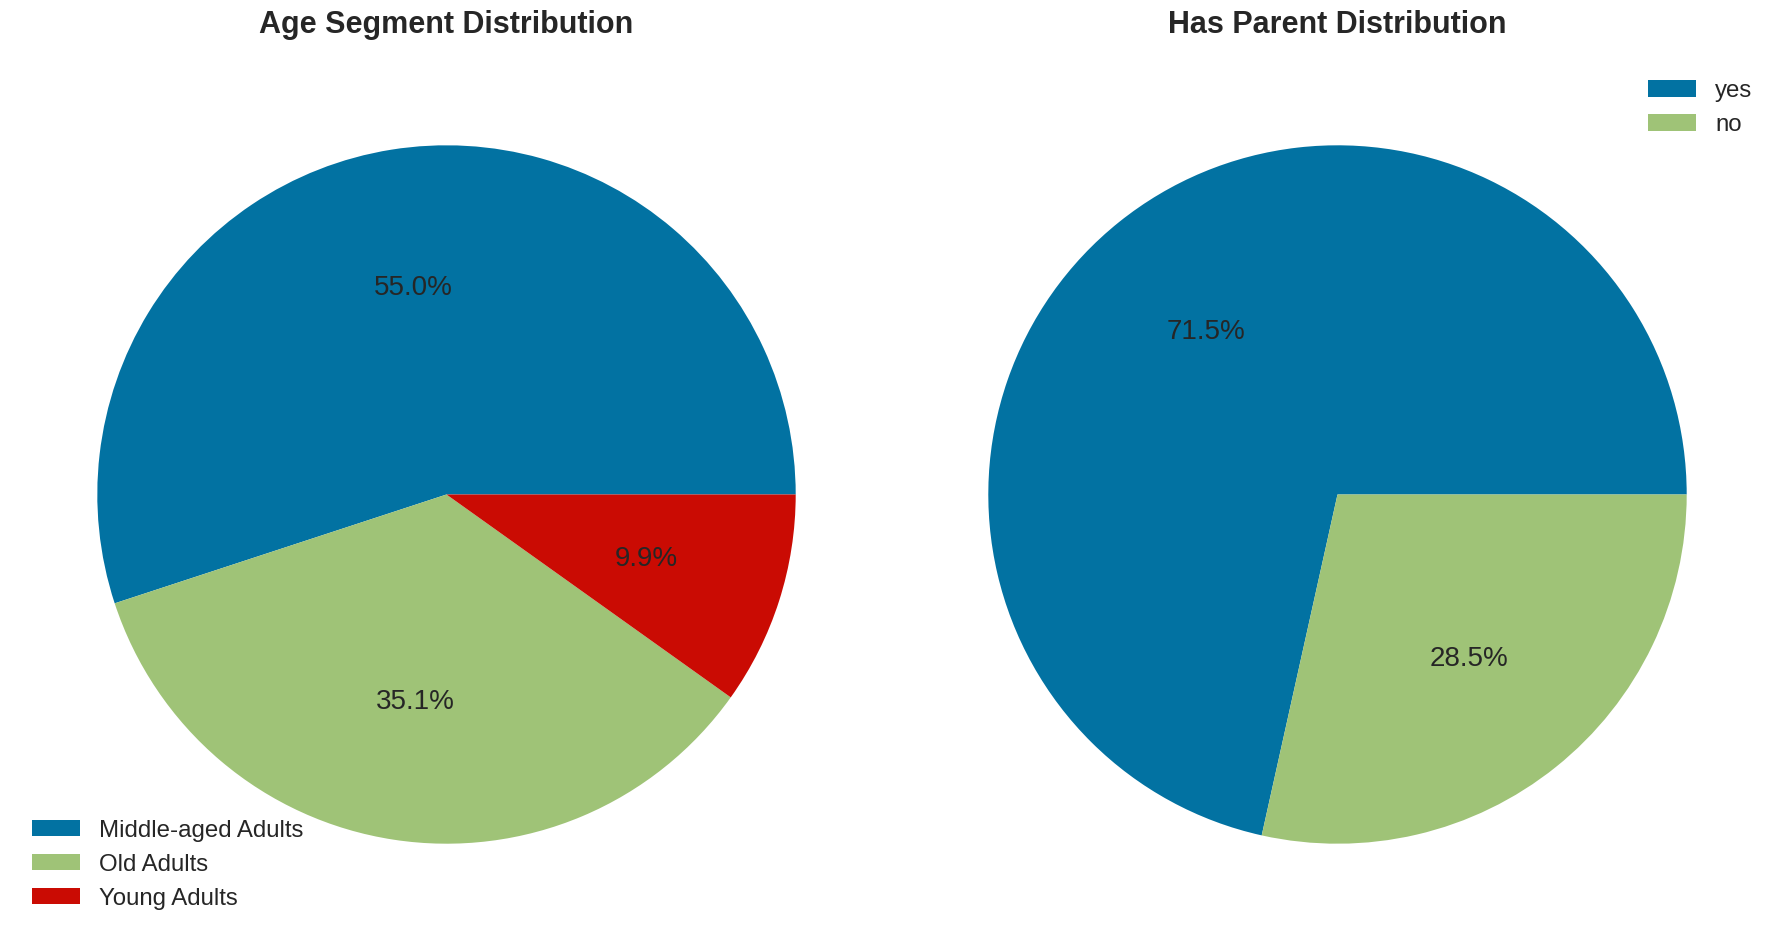

In [ ]:
# Assuming dfg is your DataFrame
agesegemnt_count = dfg['AgeSegment'].value_counts()
hasparent_counts = dfg['HasParent'].value_counts()

# Create bar chart
fig, axs = plt.subplots(1, 2, figsize=(18, 14))

# Bar chart for Age Segment
bars = axs[0].bar(agesegemnt_count.index, agesegemnt_count.values)
for i, v in enumerate(agesegemnt_count.values):
    axs[0].text(i, v + 0.5, str(v), ha='center', fontsize=14)
axs[0].set_xlabel('Age Segment', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].set_title('Age Segment Distribution', fontsize=22, fontweight='bold')
axs[0].tick_params(axis='both', which='major', labelsize=14)

# Bar chart for Has Parent
bars = axs[1].bar(hasparent_counts.index, hasparent_counts.values)
for i, v in enumerate(hasparent_counts.values):
    axs[1].text(i, v + 0.5, str(v), ha='center', fontsize=14)
axs[1].set_xlabel('Has Parent', fontsize=16)
axs[1].set_ylabel('Count', fontsize=16)
axs[1].set_title('Has Parent Distribution', fontsize=22, fontweight='bold')
axs[1].tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.show()

# Create pie chart
fig, axs = plt.subplots(1, 2, figsize=(18, 14))

# The age segment distribution
patches, texts, autotexts = axs[0].pie(
    agesegemnt_count,
    autopct='%1.1f%%',
    textprops={'size': 20}
)

axs[0].legend(patches, agesegemnt_count.index, loc="best", fontsize='x-large')
axs[0].set_title(
    "Age Segment Distribution",
    fontsize=22,
    fontweight='bold',
    y=1.02
)

# The has parent distribution
patches, texts, autotexts = axs[1].pie(
    hasparent_counts,
    autopct='%1.1f%%',
    textprops={'size': 20}
)

axs[1].legend(patches, hasparent_counts.index, loc="best", fontsize='x-large')
axs[1].set_title(
    "Has Parent Distribution",
    fontsize=22,
    fontweight='bold',
    y=1.02
)

plt.tight_layout()
plt.show()


From our analysis of the customer data, we can draw several key insights about the demographic profile of our majority customer base:

1. Age Segment: The largest age group among our customers is middle-aged adults, specifically those between 40 and 59 years old, comprising 55.0% of the customer base. This suggests our products or services may be particularly appealing to individuals in this life stage.

2. Parental Status: A majority of our customers, 71.5%, have children. This implies our offerings likely cater well to the needs of parents and families.

In summary, the typical customer in the majority customer base is a middle-aged adult who has a parent. This demographic information can help the business better understand and cater to its primary target audience.

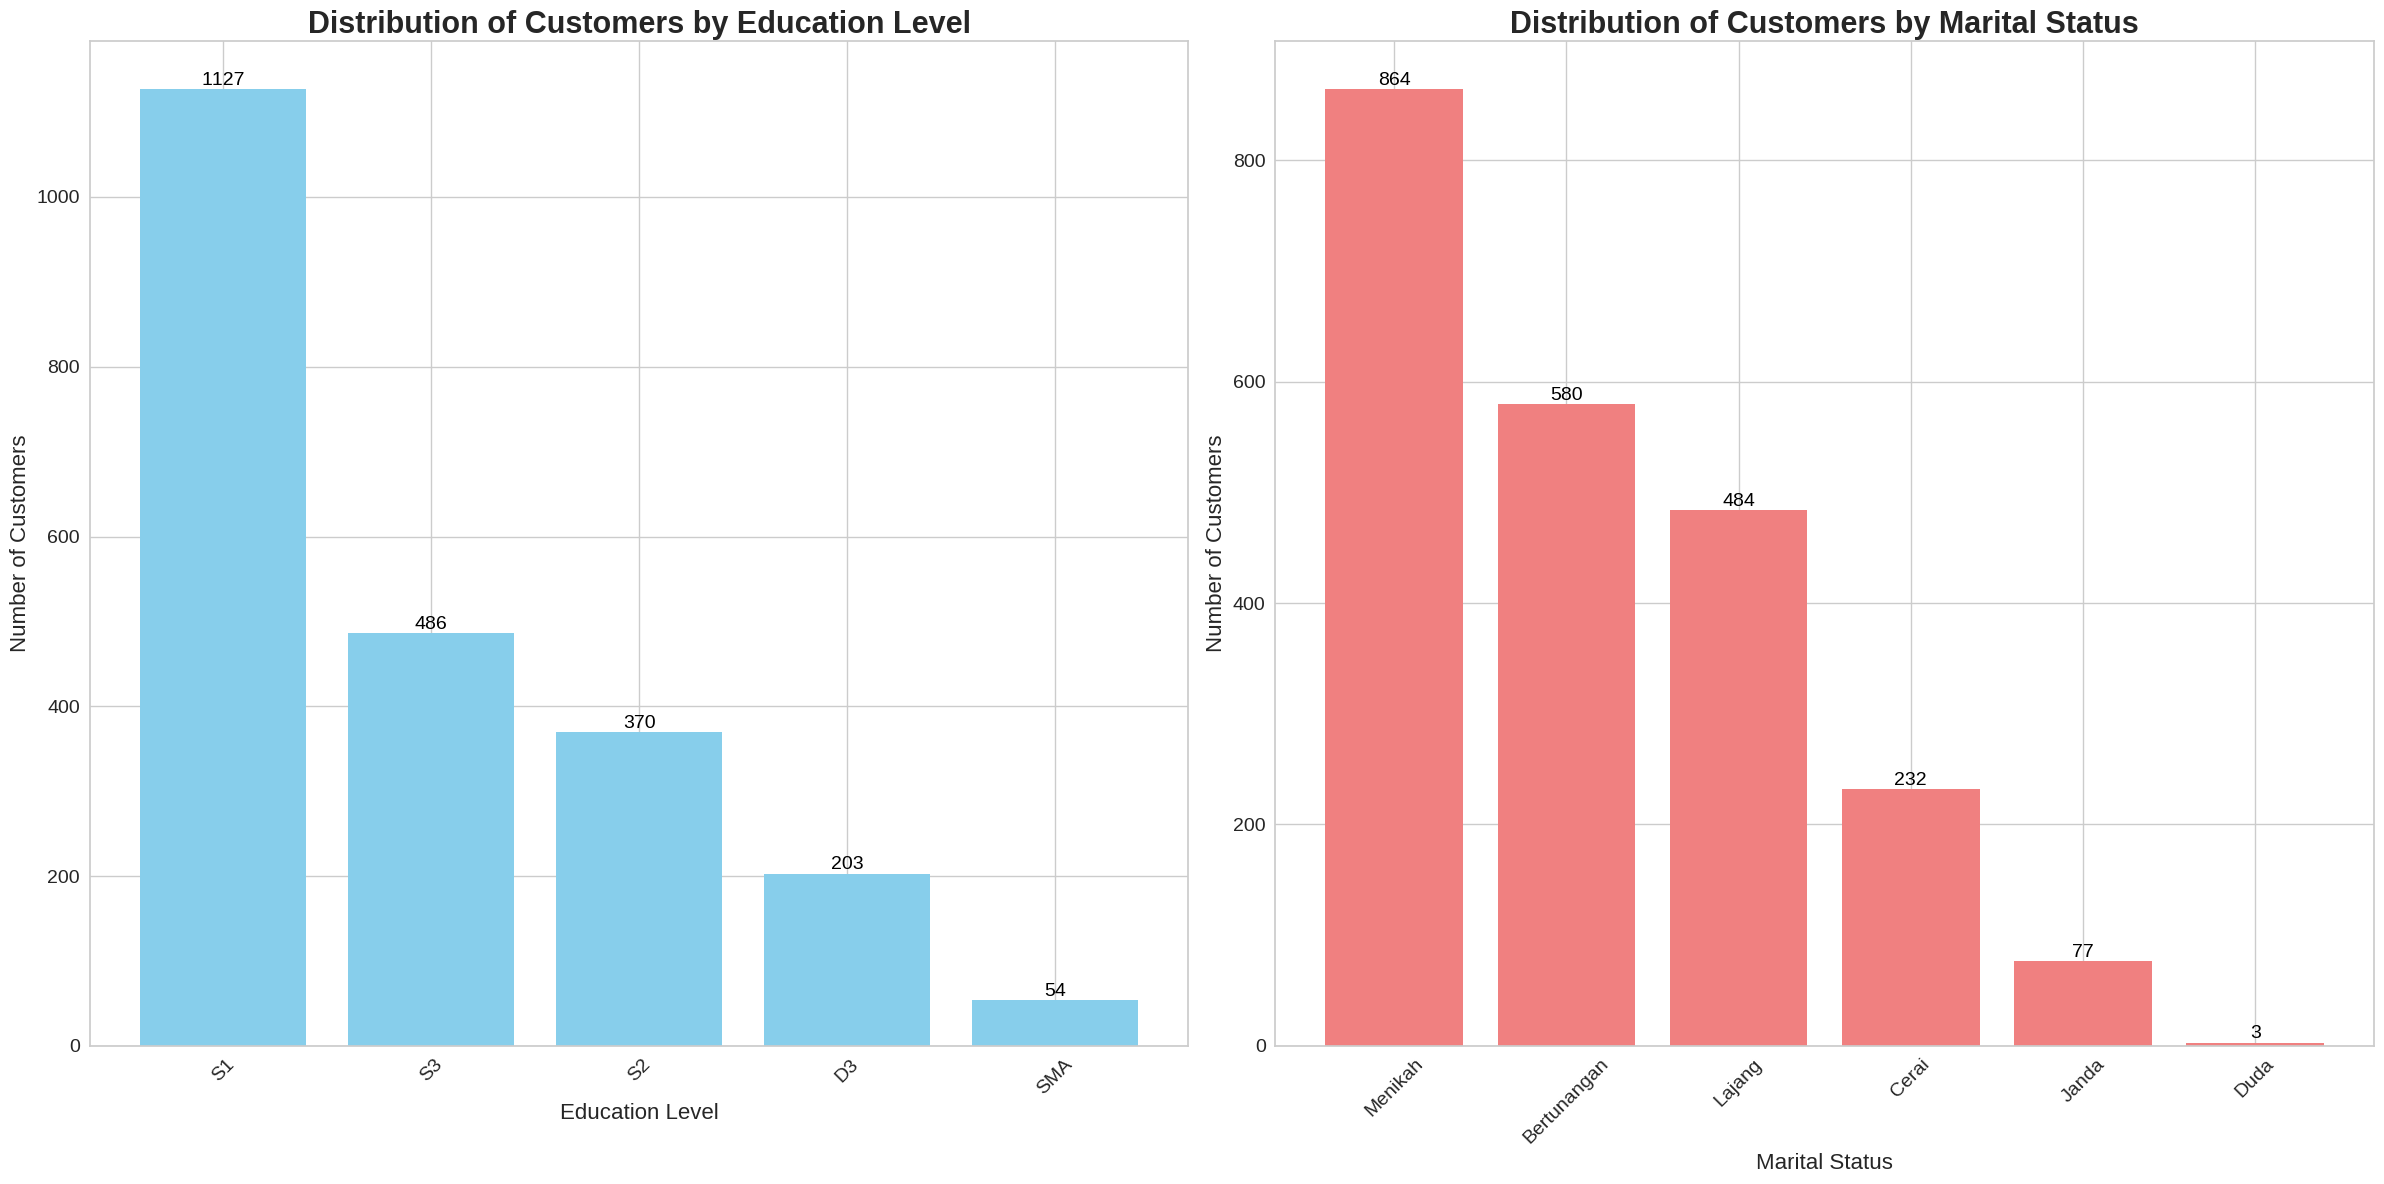

In [ ]:
# Create a subplot grid for bar charts
fig, axs = plt.subplots(1, 2, figsize=(24, 12))

# Get counts of each education level
education_counts = dfg['Education'].value_counts()

# Create bar chart for education level distribution
bars1 = axs[0].bar(education_counts.index, education_counts, color='skyblue')
axs[0].set_title("Distribution of Customers by Education Level", fontsize=22, fontweight='bold')
axs[0].set_xlabel("Education Level", fontsize=16)
axs[0].set_ylabel("Number of Customers", fontsize=16)
axs[0].tick_params(axis='x', rotation=45, labelsize=14)
axs[0].tick_params(axis='y', labelsize=14)

# Annotate bars with counts
for bar in bars1:
    height = bar.get_height()
    axs[0].annotate(f'{height}',
                   xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', fontsize=14, color='black')

# Get counts of each marital status
marital_counts = dfg['Marital_Status'].value_counts()

# Create bar chart for marital status distribution
bars2 = axs[1].bar(marital_counts.index, marital_counts, color='lightcoral')
axs[1].set_title("Distribution of Customers by Marital Status", fontsize=22, fontweight='bold')
axs[1].set_xlabel("Marital Status", fontsize=16)
axs[1].set_ylabel("Number of Customers", fontsize=16)
axs[1].tick_params(axis='x', rotation=45, labelsize=14)
axs[1].tick_params(axis='y', labelsize=14)

# Annotate bars with counts
for bar in bars2:
    height = bar.get_height()
    axs[1].annotate(f'{height}',
                   xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', fontsize=14, color='black')

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Display the figure
plt.show()

From our analysis of the customer data, we can draw several key insights about the demographic profile of our majority customer base:
1. Education Level: The most common education level attained by our customers is a Bachelor's degree, representing 58.2% of the customer base. This could indicate our products or services align with the preferences and means of those with this level of educational attainment.

2. Marital Status: Most of our customers, 48.0%, are married. This may signify that our products or services are popular among couples or tailored to the needs of married individuals.

In summary, the typical customer in the majority customer base is a married or engaged. This demographic information can help the business better understand and cater to its primary target audience.

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


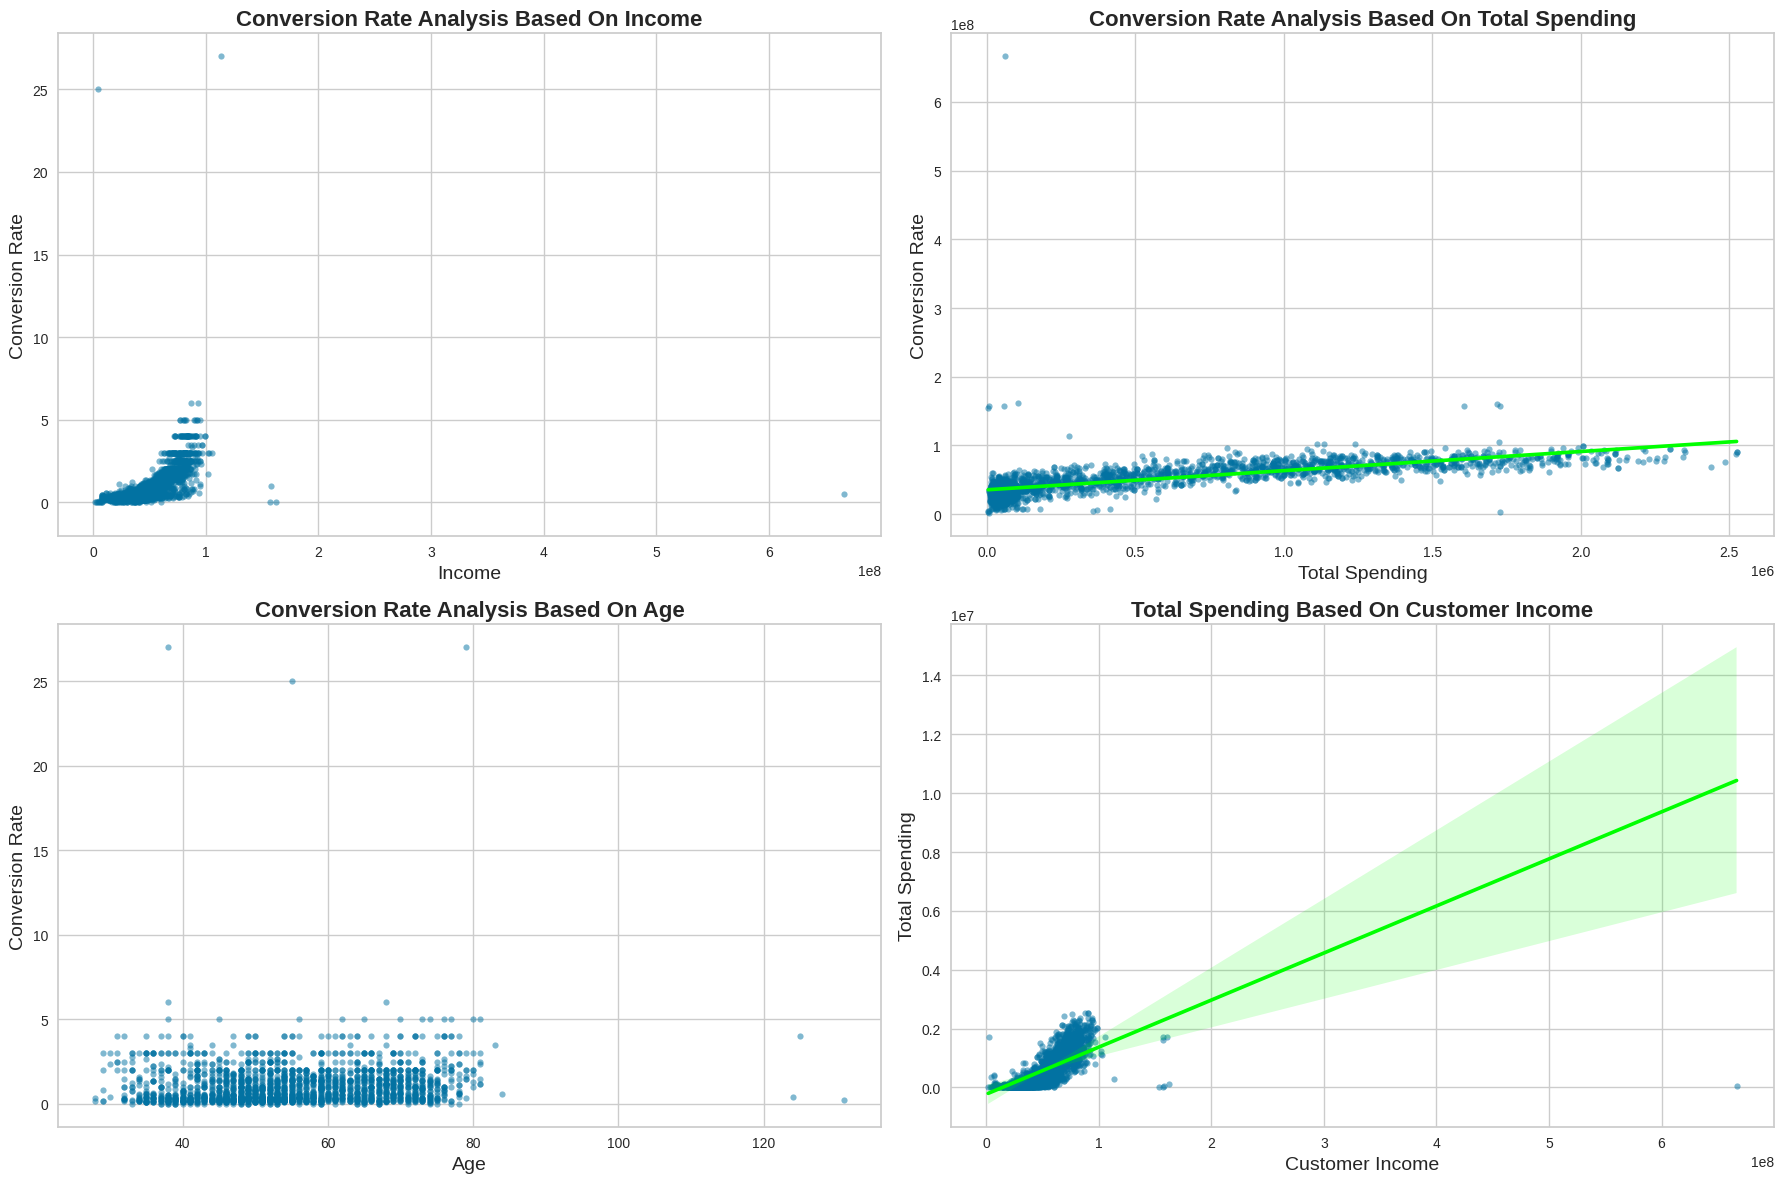

In [ ]:
# Create a subplot grid for scatter plots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Scatter plot with regression line for Income vs Conversion Rate
sns.regplot(x='Income', y='ConversionRate', data=dfg, scatter_kws={'s': 20, 'alpha': 0.5}, line_kws={'color': 'lime'}, ax=axs[0, 0])
axs[0, 0].set_title('Conversion Rate Analysis Based On Income', fontsize=16, fontweight='bold')
axs[0, 0].set_xlabel('Income', fontsize=14)
axs[0, 0].set_ylabel('Conversion Rate', fontsize=14)
axs[0, 0].grid(True)

# Scatter plot with regression line for Total Spending vs Conversion Rate
sns.regplot(x='TotalSpent', y='Income', data=dfg, scatter_kws={'s': 20, 'alpha': 0.5}, line_kws={'color': 'lime'}, ax=axs[0, 1])
axs[0, 1].set_title('Conversion Rate Analysis Based On Total Spending', fontsize=16, fontweight='bold')
axs[0, 1].set_xlabel('Total Spending', fontsize=14)
axs[0, 1].set_ylabel('Conversion Rate', fontsize=14)
axs[0, 1].grid(True)

# Scatter plot with regression line for Age vs Conversion Rate
sns.regplot(x='Age', y='ConversionRate', data=dfg, scatter_kws={'s': 20, 'alpha': 0.5}, line_kws={'color': 'lime'}, ax=axs[1, 0])
axs[1, 0].set_title('Conversion Rate Analysis Based On Age', fontsize=16, fontweight='bold')
axs[1, 0].set_xlabel('Age', fontsize=14)
axs[1, 0].set_ylabel('Conversion Rate', fontsize=14)
axs[1, 0].grid(True)

# Scatter plot with regression line for Customer Income vs Total Spending
sns.regplot(x='Income', y='TotalSpent', data=dfg, scatter_kws={'s': 20, 'alpha': 0.5}, line_kws={'color': 'lime'}, ax=axs[1, 1])
axs[1, 1].set_title('Total Spending Based On Customer Income', fontsize=16, fontweight='bold')
axs[1, 1].set_xlabel('Customer Income', fontsize=14)
axs[1, 1].set_ylabel('Total Spending', fontsize=14)
axs[1, 1].grid(True)

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plot
plt.show()


Overall, the data reveals several important relationships that can inform the business strategy:

1. Income and Conversion Rate: There is a positive correlation between customer income and conversion rate, though it is not a linear relationship. Identifying the optimal income range that maximizes conversion rates can help target the most valuable customer segments.
2. Spending and Conversion Rate: Total customer spending is strongly positively correlated with conversion rate. Customers who spend more tend to have higher conversion rates. Focusing on high-spending customers could be an effective strategy to drive overall conversion.
3. Age and Conversion Rate: Conversion rates exhibit a U-shaped relationship with customer age. Younger and older customers tend to have higher conversion rates compared to middle-aged customers. Understanding the needs and behaviors of different age groups can enable more tailored marketing approaches.
4. Income and Spending: There is a clear linear relationship between customer income and total spending. Higher-income customers spend more overall, which is valuable for segmentation and targeting.

These insights suggest that customer income, total spending, and age are important factors that influence the conversion rate for this business. Understanding these relationships can help optimize marketing strategies, product offerings, and customer engagement to improve overall conversion performance.

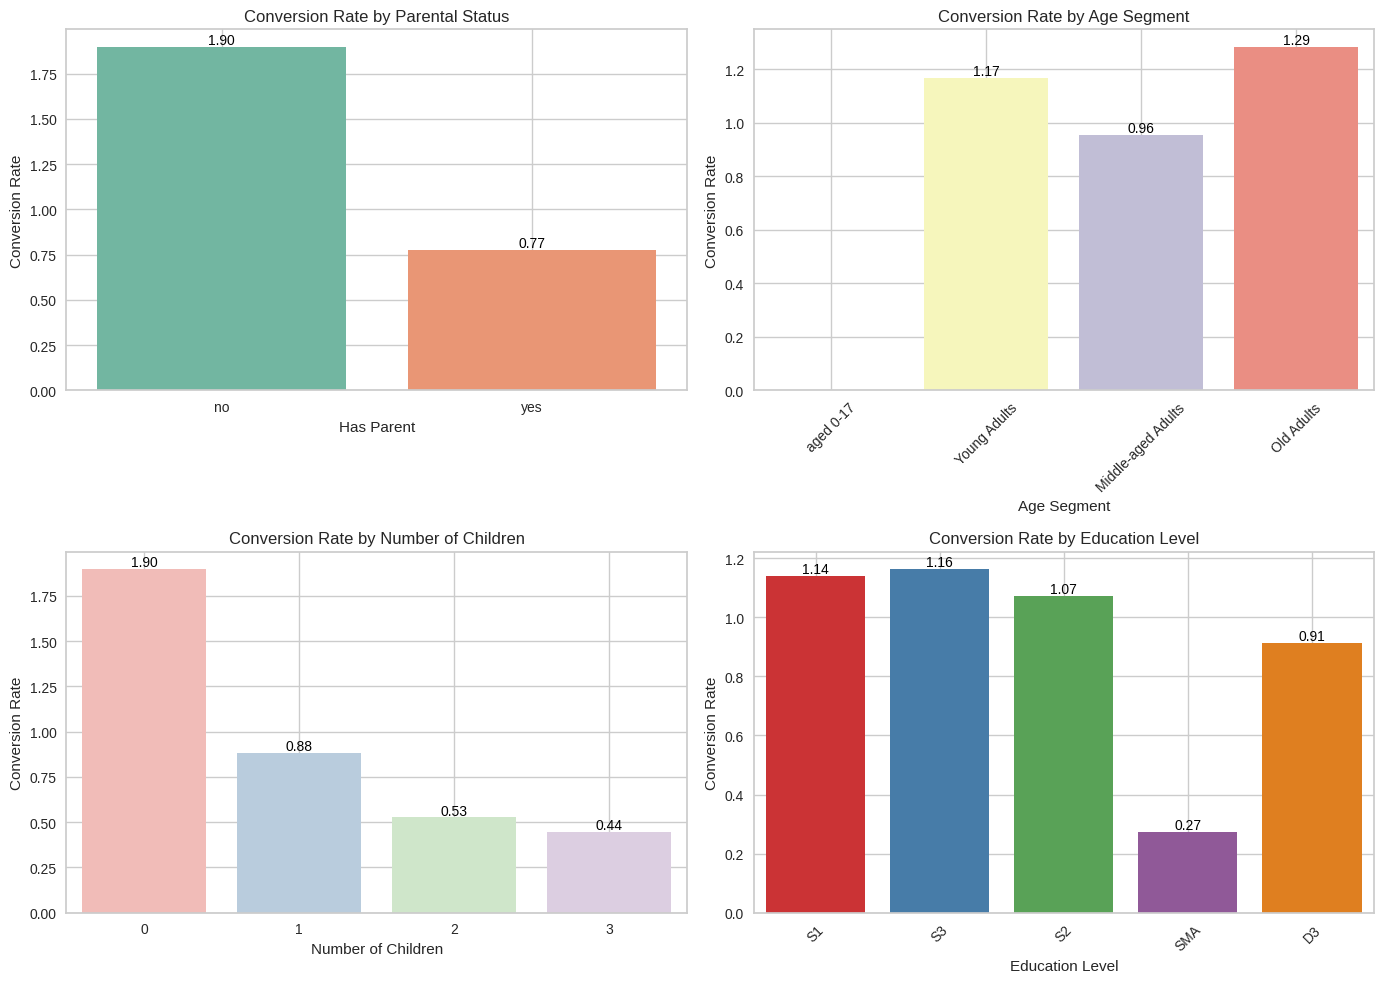

In [ ]:
import warnings
warnings.filterwarnings('ignore')


# Plotting Conversion Rate by Parental Status using barplot
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.barplot(x='HasParent', y='ConversionRate', data=dfg, palette='Set2', ci=None)
plt.title('Conversion Rate by Parental Status')
plt.xlabel('Has Parent')
plt.ylabel('Conversion Rate')

# Annotate each bar with its value
for p in plt.gca().patches:
    plt.gca().annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.grid(True)

# Plotting Conversion Rate by Age Segment using barplot
plt.subplot(2, 2, 2)
sns.barplot(x='AgeSegment', y='ConversionRate', data=dfg, palette='Set3', order=['aged 0-17', 'Young Adults', 'Middle-aged Adults', 'Old Adults'], ci=None)
plt.title('Conversion Rate by Age Segment')
plt.xlabel('Age Segment')
plt.ylabel('Conversion Rate')

# Annotate each bar with its value
for p in plt.gca().patches:
    plt.gca().annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.grid(True)
plt.xticks(rotation=45)

# Plotting Conversion Rate by Number of Children using barplot
plt.subplot(2, 2, 3)
sns.barplot(x='NumChildren', y='ConversionRate', data=dfg, palette='Pastel1', ci=None)
plt.title('Conversion Rate by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Conversion Rate')

# Annotate each bar with its value
for p in plt.gca().patches:
    plt.gca().annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.grid(True)

# Plotting Conversion Rate by Education Level using barplot
plt.subplot(2, 2, 4)
sns.barplot(x='Education', y='ConversionRate', data=dfg, palette='Set1', ci=None)
plt.title('Conversion Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Conversion Rate')

# Annotate each bar with its value
for p in plt.gca().patches:
    plt.gca().annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.grid(True)
plt.xticks(rotation=45)

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plots
plt.show()

After closely examining the provided charts, I've identified several compelling insights about our customer behavior:

1. Conversion Rates by Age Segment:
    
    The data reveals a distinct U-shaped trend in conversion rates across age groups. The highest conversion rate of 1.22 is observed for the Old Adults segment (60+ years), significantly outperforming the other age groups. Interestingly, the second highest rate of 1.17 is seen for the youngest 0-17 age group. In contrast, the middle-aged segments like Young Adults (0.97) and Middle-Aged Adults (1.07) have lower conversion rates. This suggests age is a crucial factor, with older and younger customers being more likely to complete purchases.

2. Conversion Rates by Parental Status:
    
    The data clearly shows that customers without children have a substantially higher conversion rate of 1.90 compared to just 0.77 for customers with children. This indicates parental status is a strong predictor of conversion behavior, with non-parents demonstrating a greater propensity to convert.

3. Conversion Rates by Number of Children:
    
    As the number of children increases, the conversion rate steadily declines. Customers with no children have the highest rate of 1.90, while those with 3 or more children have the lowest rate of 0.44. This inverse relationship between number of children and conversion rate is a key insight.

4. Conversion Rates by Education Level:
    
    Higher education levels appear to positively correlate with conversion rates. Customers with a Bachelor's degree (1.16) or postgraduate education (1.07) have significantly higher rates than those with just a high school degree (0.91) or some college experience (0.27). This suggests education is an important factor influencing purchasing behavior.

In summary, the data highlights several critical customer behavior patterns. Age, parental status, number of children, and education level are all significant drivers of conversion rates. These insights can inform targeted marketing strategies and optimizations to improve overall conversion performance.

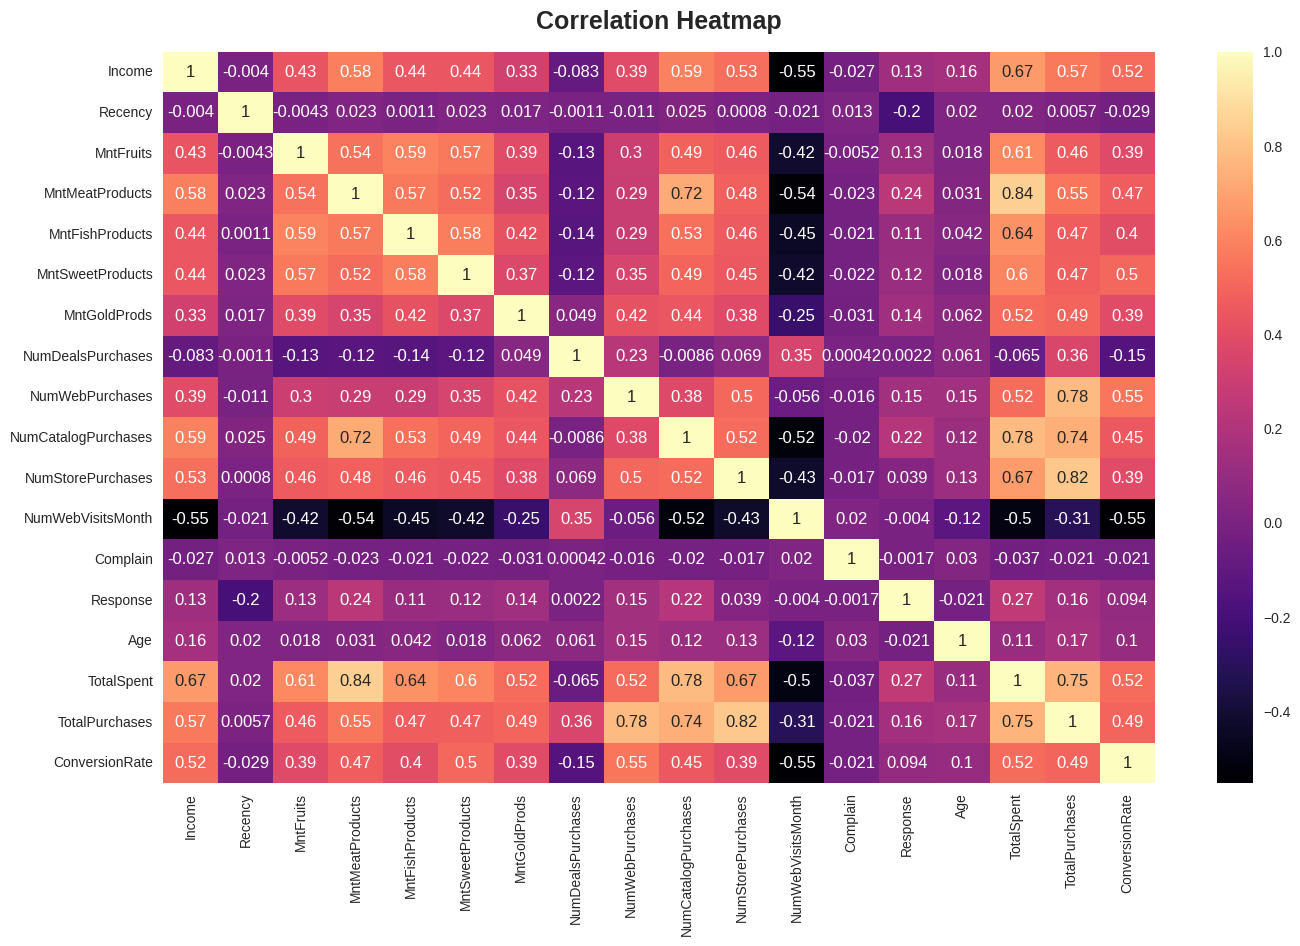

In [ ]:
# List of numerical variables to make the correlations
nums = [
      'Income', 'Recency', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
      'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
      'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain',
      'Response', 'Age', 'TotalSpent', 'TotalPurchases', 'ConversionRate'
]

plt.figure(figsize=(16, 9.5))

# Compute the correlation matrix for the numerical features and plot it as a heatmap
matrix_corellation = dfg[nums].corr()
sns.heatmap(matrix_corellation, annot=True, cmap='magma')

# Set the title of the heatmap
plt.title('Correlation Heatmap', fontsize=18, fontweight='bold', y=1.02)

# Display the heatmap
plt.show()

From the correlation heatmap, the highest correlation is between Income and Conversion Rate, which is 0.52. This positive correlation suggests that the higher the customer's income, the higher their conversion rate tends to be.

This can be clearly seen in the "Conversion Rate Analysis Based on Income" scatter plot, where the data points show an upward trend - the higher the income, the higher the corresponding conversion rate.

So in summary, the correlation heatmap and the related scatter plot indicate a strong positive relationship between customer income and conversion rate, where higher income customers have higher conversion rates.

## Task 2 :  Data Cleaning & Preprocessing
Work Stages:


1.   Handle Mising Values and Duplicate Values
2.   Feature Encoding
3.   Feature Standardization

### Handling Misisng Value

Number of missing values per column:
Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
AgeSegment              0
HasParent               0
NumChildren             0
TotalAccCmp             0
TotalSpent              0
TotalPurchases          0
C

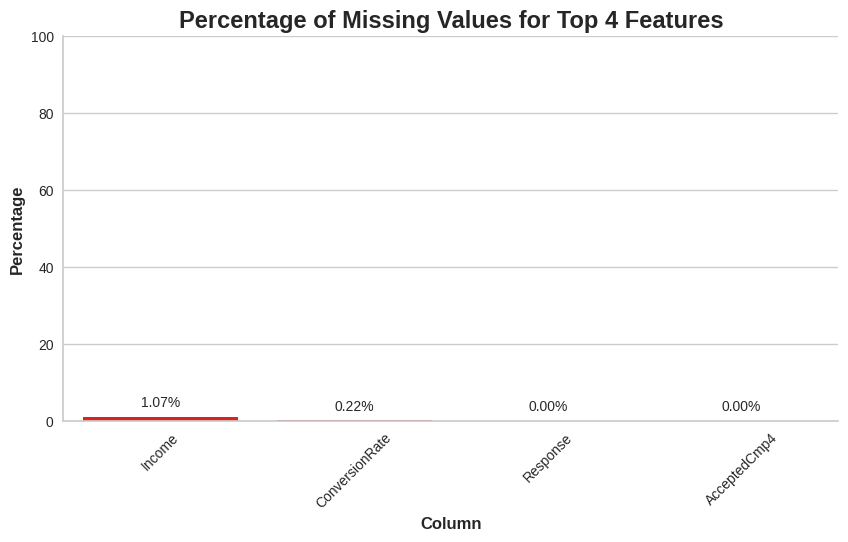

In [ ]:
# Create a copy of the dataframe to preserve the original data
df_copy = dfg.copy()

# Check for missing values in each column
print("Number of missing values per column:")
print(df_copy.isna().sum())

# Check the percentage of missing values
missing_percentages = round(100 * (df_copy.isna().sum() / len(df_copy)), 2)
print("\nPercentage of missing values per column:")
print(missing_percentages)

# Identify variables with high missing rates (> 10%)
high_missing_vars = missing_percentages[missing_percentages > 10].index
print("\nVariables with missing rates > 10%:")
print(high_missing_vars)

# Sort the missing percentages in descending order and select the top 4
top_missing = missing_percentages.sort_values(ascending=False).head(4)

# Visualize the missing data for the top 4 features
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=top_missing.index, y=top_missing.values, color='red')

# Annotate the bars with the missing percentage values
for p in ax.patches:
    ax.annotate('%.2f%%' % p.get_height(), xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=10)

# Set plot title and axis labels
plt.title('Percentage of Missing Values for Top 4 Features', fontsize=17, fontweight='bold')
sns.despine()
plt.xlabel('Column', fontsize=12, fontweight='bold')
plt.ylabel('Percentage', fontsize=12, fontweight='bold')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()

The data set appears to be of high quality overall, with very low missing values. Income highest at 1.07%, ConversionRate at 0.22%. Low missing values allow judicious imputation or row dropping without risk of bias or substantial data loss. Robust dataset, analysts can handle minor missing value issues with standard cleaning and preprocessing techniques, enabling confident, high-quality analysis.

In [ ]:
# Select the columns 'NumWebPurchases', 'NumWebVisitsMonth', and 'ConversionRate' from the dataframe 'dfp'
dfg_missing_values = dfg[['NumWebPurchases', 'NumWebVisitsMonth', 'ConversionRate']]

# Filter the rows in 'missing_cr' where any of the columns have missing values
dfg_missing_values2 = dfg_missing_values[dfg_missing_values.isna().any(axis=1)]
display(dfg_missing_values2)


,NumWebPurchases,NumWebVisitsMonth,ConversionRate
164,0,0,NaN
655,0,0,NaN
687,0,0,NaN
2132,0,0,NaN
2228,0,0,NaN


In [ ]:
# Handling missing values
# Fill missing values in 'Income' with the median value
dfg['Income'].fillna(dfg['Income'].median(), inplace=True)

# Drop rows where 'ConversionRate' has missing values
dfg.dropna(subset=['ConversionRate'], inplace=True)

# Verify that missing values have been handled
print("Number of missing values per column after handling missing values:")
print(dfg.isna().sum())

Number of missing values per column after handling missing values:
Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
AgeSegment             0
HasParent              0
NumChildren            0
TotalAccCmp            0
TotalSpent             0
TotalPurchases         0
Conversi

From the handling of missing values in the dataset, we can infer the following:

1. `Income` Column: Missing values were replaced with the median income. This approach was chosen because the median is a robust measure less affected by outliers, preserving the overall distribution of income data and ensuring data integrity.

2. `ConversionRate` Column: Rows with missing values in the `ConversionRate` column were dropped from the dataset. This decision was made because `ConversionRate` is a critical metric for analysis, and missing values could lead to biased insights or models. Dropping these rows maintains the accuracy and reliability of analyses without significant data loss (less than 10% of rows were dropped).

### Handling Dupliacted Values

In [ ]:
# Checking Duplicate Values
df.duplicated().sum()

0

There are no duplicate values detected in the dataset.

### Handling Infinity Values

In [ ]:
# Select numerical columns
numerical_cols = dfg.select_dtypes(include=[np.number])

# Check for infinity values in numerical columns
is_infinity = numerical_cols.applymap(lambda x: np.isinf(x))

# Print dataframe showing positions of infinity values
print("Dataframe with positions of infinity values:")
print(is_infinity)

# Count the number of infinity values in each column
count_inf_per_column = is_infinity.sum()

# Calculate total number of infinity values in the dataframe
total_inf = count_inf_per_column.sum()

print(f"Number of infinity values per column:\n{count_inf_per_column}")
print(f"Total infinity values in the dataframe: {total_inf}")

# Show columns containing infinity values
columns_with_inf = numerical_cols.columns[is_infinity.any()]

print("Columns containing infinity values:")
print(columns_with_inf)

Dataframe with positions of infinity values:
      Unnamed: 0     ID  Year_Birth  Income  Kidhome  Teenhome  Recency  \
0          False  False       False   False    False     False    False   
1          False  False       False   False    False     False    False   
2          False  False       False   False    False     False    False   
3          False  False       False   False    False     False    False   
4          False  False       False   False    False     False    False   
...          ...    ...         ...     ...      ...       ...      ...   
2235       False  False       False   False    False     False    False   
2236       False  False       False   False    False     False    False   
2237       False  False       False   False    False     False    False   
2238       False  False       False   False    False     False    False   
2239       False  False       False   False    False     False    False   

      MntCoke  MntFruits  MntMeatProducts  ...  Compla

In [ ]:
# Replace infinity values with NaN
dfg.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows containing NaN values
dfg.dropna(inplace=True)

# Print the number of ntries in the dataframe after cleaning
print(f"\nNumber of entries in the dataframe after cleaning: {len(dfg)}")

# Verifying that no infinity values remain
no_inf = (dfg.applymap(lambda x: isinstance(x, float) and x == float('inf'))).sum().sum()
print(f"Total infinity values in the dataframe after handling: {no_inf}")


Number of entries in the dataframe after cleaning: 2229
Total infinity values in the dataframe after handling: 0


  Handling infinity values in the dataframe is crucial because these values can arise from operations such as division by zero or other calculations that result in infinite values. These infinity values can lead to significant issues in data analysis and machine learning models, such as errors during model training and incorrect statistical calculations. By replacing infinity values with NaN and subsequently removing them, the data can be standardized, making it suitable for further analysis and modeling. Since the `ConversionRate` column contains infinity values, it's important to handle them to ensure your data is clean and ready for analysis or machine learning.


### Handling Outlier

In [ ]:
# Define the columns to cap outliers in
def col_outliers(data, columns):
    result = data.copy()
    for col in columns:
        Q1 = result[col].quantile(0.25)
        Q3 = result[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        result[col] = np.where(result[col] < lower_bound, lower_bound, result[col])
        result[col] = np.where(result[col] > upper_bound, upper_bound, result[col])
    return result

outlier_columns = ['Income', 'MntMeatProducts', 'MntSweetProducts', 'MntGoldProds',
                   'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                   'NumWebVisitsMonth', 'Age', 'TotalPurchases', 'ConversionRate']

dfg_nonutlier = col_outliers(dfg, outlier_columns)
dfg_nonutlier.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Z_Revenue,Response,Age,AgeSegment,HasParent,NumChildren,TotalAccCmp,TotalSpent,TotalPurchases,ConversionRate
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,11,1,67.0,Old Adults,no,0,0,1617000,25.0,1.142857
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,11,0,70.0,Old Adults,yes,2,0,27000,6.0,0.200000
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,11,0,59.0,Middle-aged Adults,no,0,0,776000,21.0,2.000000
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,11,0,40.0,Middle-aged Adults,yes,1,0,53000,8.0,0.333333
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,11,0,43.0,Middle-aged Adults,yes,1,0,422000,19.0,1.000000


Descriptive Statistics:
             Income  MntMeatProducts  MntSweetProducts   MntGoldProds  \
count  2.229000e+03     2.229000e+03       2229.000000    2229.000000   
mean   5.199732e+07     1.647214e+05      27111.709287   43933.153881   
std    2.463332e+07     2.196920e+05      41352.619400   51825.183636   
min    1.730000e+06     0.000000e+00          0.000000       0.000000   
25%    3.544100e+07     1.600000e+04       1000.000000    9000.000000   
50%    5.138150e+07     6.700000e+04       8000.000000   24000.000000   
75%    6.811800e+07     2.300000e+05      33000.000000   56000.000000   
max    6.666660e+08     1.725000e+06     263000.000000  362000.000000   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count        2229.000000      2229.000000          2229.000000   
mean            2.321220         4.089726             2.637954   
std             1.895379         2.748106             2.842896   
min             0.000000         0.000000             

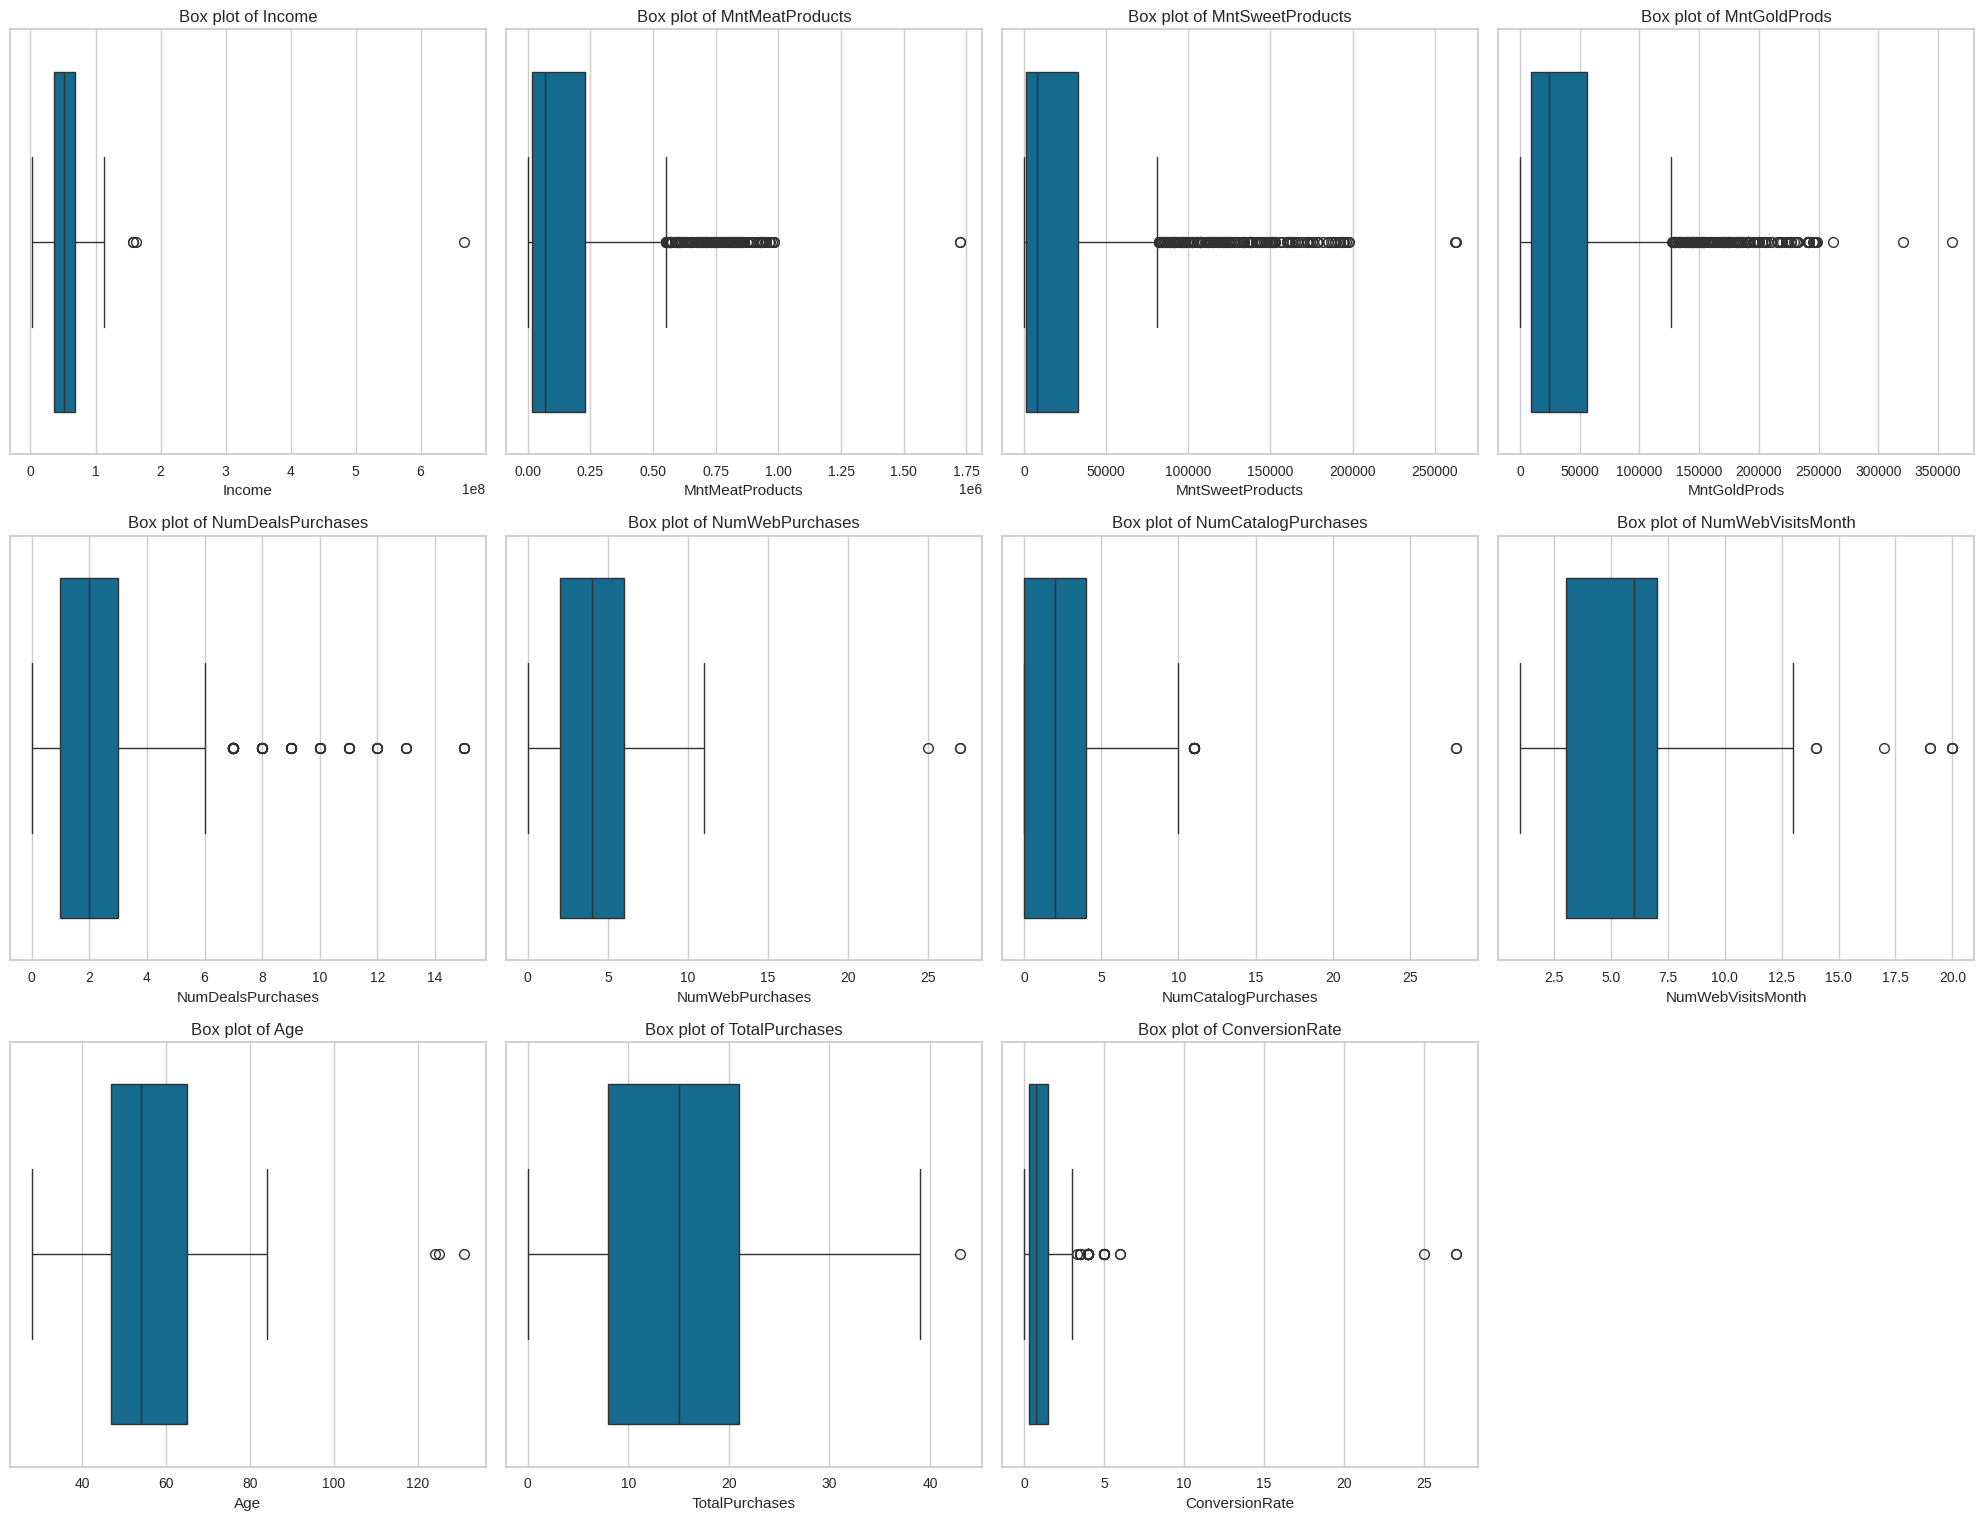

In [ ]:
# Check Descriptive Statistics
print("Descriptive Statistics:")
print(dfg[outlier_columns].describe())

# Set up the matplotlib figure
fig, axes = plt.subplots(4, 4, figsize=(20, 20))  # 4x4 grid

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, col in enumerate(outlier_columns):
    sns.boxplot(x=dfg[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')

# Remove any empty subplots (if there are less than 16 columns)
for j in range(i+1, 16):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Based on analysis of identifying and addressing outliers in a dataset. By defining a set of relevant numerical columns as the "`outlier_columns`", the code applies a consistent outlier capping method across these variables.

1. Before the outlier treatment, there are several extremely high values, as evidenced by the very long vertical lines extending outside the box plot bounds. This indicates the presence of outliers or values that are vastly different from the general data distribution.

2. After the outlier treatment, the box plots show a much more compact and controlled distribution. The vertical lines representing the data range have become shorter, suggesting that the extreme values have been addressed.

3. This stark change suggests that the outlier treatment process has successfully reduced the influence of the values that deviated significantly from the overall data distribution. This will have a positive impact on subsequent data analysis and modeling, as the outliers no longer distort the results substantially.

In summary, this plot demonstrates that the outlier treatment approach applied has been able to make the data distribution more concise, stable, and representative for further analysis.

### Feature Selection
#### Drop the Unnecesarry Data
There are several columns identified as unnecessary based on the analysis:

*   The row that contains the missing value
*   Columns whose values are not related to purchase decisions, such as Columns related to personal identification or irrelevant to purchase decisions, such as `Unnamed: 0`, `Year_Birth`, `ID`, `Dt_Customer`.
*   Columns that do not provide valuable information for the analysis, such as `Z_CostContact` and `Z_Revenue`.


In [ ]:
# Drop unnecessary data based on capped outliers or modified columns
unnecessary_columns = ['Unnamed: 0', 'Year_Birth', 'ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue']

# Drop columns from DataFrame
dfg_nonutlier.drop(columns=unnecessary_columns, inplace=True)

# Optionally, you can recheck the columns after dropping
print("Remaining columns after dropping unnecessary data:")
print(dfg_nonutlier.columns)

Remaining columns after dropping unnecessary data:
Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age',
       'AgeSegment', 'HasParent', 'NumChildren', 'TotalAccCmp', 'TotalSpent',
       'TotalPurchases', 'ConversionRate'],
      dtype='object')


In [ ]:
dfg_nonutlier.head(4)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Response,Age,AgeSegment,HasParent,NumChildren,TotalAccCmp,TotalSpent,TotalPurchases,ConversionRate
0,S1,Lajang,58138000.0,0,0,58,635000,88000,546000.0,172000,...,0,1,67.0,Old Adults,no,0,0,1617000,25.0,1.142857
1,S1,Lajang,46344000.0,1,1,38,11000,1000,6000.0,2000,...,0,0,70.0,Old Adults,yes,2,0,27000,6.0,0.200000
2,S1,Bertunangan,71613000.0,0,0,26,426000,49000,127000.0,111000,...,0,0,59.0,Middle-aged Adults,no,0,0,776000,21.0,2.000000
3,S1,Bertunangan,26646000.0,1,0,26,11000,4000,20000.0,10000,...,0,0,40.0,Middle-aged Adults,yes,1,0,53000,8.0,0.333333


### Feature Encoding

In [ ]:
# Check unique values in 'Education' column
dfg_nonutlier['Education'].unique()

array(['S1', 'S3', 'S2', 'SMA', 'D3'], dtype=object)

In [ ]:
dfg_nonutlier['AgeSegment'].unique()

array(['Old Adults', 'Middle-aged Adults', 'Young Adults'], dtype=object)

In [ ]:
# Label Encoding for Education and AgeSegment
LabelEncod = LabelEncoder()
dfg_nonutlier['Education'] = LabelEncod.fit_transform(dfg_nonutlier['Education'])
dfg_nonutlier['AgeSegment'] = LabelEncod.fit_transform(dfg_nonutlier['AgeSegment'])

# One-Hot Encoding for Marital_Status
maritalstatus_encoded = pd.get_dummies(dfg_nonutlier['Marital_Status'], prefix='Marital').astype(int)
dfg_nonutlier = pd.concat([dfg_nonutlier, maritalstatus_encoded], axis=1)

# One-Hot Encoding for Parent
hasparent_encoded = pd.get_dummies(dfg_nonutlier['HasParent'], prefix='HasParent').astype(int)
dfg_nonutlier = pd.concat([dfg_nonutlier, hasparent_encoded], axis=1)

# Drop columns that are no longer needed after encoding
dfg_nonutlier.drop(columns=['Marital_Status', 'HasParent'], inplace=True)

print('\nDataFrame after feature encoding:')
display(dfg_nonutlier.head())


DataFrame after feature encoding:


,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,TotalPurchases,ConversionRate,Marital_Bertunangan,Marital_Cerai,Marital_Duda,Marital_Janda,Marital_Lajang,Marital_Menikah,HasParent_no,HasParent_yes
0,1,58138000.0,0,0,58,635000,88000,546000.0,172000,81000.0,...,25.0,1.142857,0,0,0,0,1,0,1,0
1,1,46344000.0,1,1,38,11000,1000,6000.0,2000,1000.0,...,6.0,0.200000,0,0,0,0,1,0,0,1
2,1,71613000.0,0,0,26,426000,49000,127000.0,111000,21000.0,...,21.0,2.000000,1,0,0,0,0,0,1,0
3,1,26646000.0,1,0,26,11000,4000,20000.0,10000,3000.0,...,8.0,0.333333,1,0,0,0,0,0,0,1
4,3,58293000.0,1,0,94,173000,43000,118000.0,46000,27000.0,...,19.0,1.000000,0,0,0,0,0,1,0,1


In [ ]:
dfg_nonutlier.sample(5)

,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,TotalPurchases,ConversionRate,Marital_Bertunangan,Marital_Cerai,Marital_Duda,Marital_Janda,Marital_Lajang,Marital_Menikah,HasParent_no,HasParent_yes
11,4,7500000.0,0,0,59,6000,16000,11000.0,11000,1000.0,...,6.0,0.250000,0,0,0,0,0,1,1,0
1029,0,68316000.0,0,1,54,806000,80000,161000.0,120000,11000.0,...,32.0,1.666667,1,0,0,0,0,0,0,1
177,3,38853000.0,1,1,90,29000,0,14000.0,0,0.0,...,7.0,0.285714,0,0,0,0,0,1,0,1
1864,1,69109000.0,0,0,10,823000,25000,459000.0,124000,29000.0,...,20.0,1.500000,0,0,0,0,0,1,1,0
841,1,40049000.0,0,1,61,91000,65000,52000.0,10000,44000.0,...,14.0,0.600000,0,0,0,0,0,1,0,1


In [ ]:
dfg_nonutlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2229 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2229 non-null   int64  
 1   Income               2229 non-null   float64
 2   Kidhome              2229 non-null   int64  
 3   Teenhome             2229 non-null   int64  
 4   Recency              2229 non-null   int64  
 5   MntCoke              2229 non-null   int64  
 6   MntFruits            2229 non-null   int64  
 7   MntMeatProducts      2229 non-null   float64
 8   MntFishProducts      2229 non-null   int64  
 9   MntSweetProducts     2229 non-null   float64
 10  MntGoldProds         2229 non-null   float64
 11  NumDealsPurchases    2229 non-null   float64
 12  NumWebPurchases      2229 non-null   float64
 13  NumCatalogPurchases  2229 non-null   float64
 14  NumStorePurchases    2229 non-null   int64  
 15  NumWebVisitsMonth    2229 non-null   float6

### Feature Standardization

In [ ]:
dfg_mod = dfg_nonutlier.copy()

In [ ]:
dfg_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2229 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2229 non-null   int64  
 1   Income               2229 non-null   float64
 2   Kidhome              2229 non-null   int64  
 3   Teenhome             2229 non-null   int64  
 4   Recency              2229 non-null   int64  
 5   MntCoke              2229 non-null   int64  
 6   MntFruits            2229 non-null   int64  
 7   MntMeatProducts      2229 non-null   float64
 8   MntFishProducts      2229 non-null   int64  
 9   MntSweetProducts     2229 non-null   float64
 10  MntGoldProds         2229 non-null   float64
 11  NumDealsPurchases    2229 non-null   float64
 12  NumWebPurchases      2229 non-null   float64
 13  NumCatalogPurchases  2229 non-null   float64
 14  NumStorePurchases    2229 non-null   int64  
 15  NumWebVisitsMonth    2229 non-null   float6

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
scaled_data = scaler.fit_transform(dfg_mod)

# Create a new DataFrame with the scaled values, preserving the column names
dfg_mod_scaled = pd.DataFrame(scaled_data, columns=dfg_mod.columns, index=dfg_mod.index)

# Display the new DataFrame after scaling
print('\nDataFrame after scaling:')
display(dfg_mod_scaled.head())


DataFrame after scaling:


,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,TotalPurchases,ConversionRate,Marital_Bertunangan,Marital_Cerai,Marital_Duda,Marital_Janda,Marital_Lajang,Marital_Menikah,HasParent_no,HasParent_yes
0,-0.579148,0.311066,-0.828645,-0.933088,0.308958,0.981406,1.556014,2.236394,2.475009,2.141847,...,1.332007,0.124323,-0.590994,-0.340023,-0.036711,-0.187882,1.903807,-0.792588,1.594904,-1.594904
1,-0.579148,-0.258284,1.027686,0.905863,-0.382267,-0.870552,-0.636803,-0.810024,-0.649633,-0.760455,...,-1.159626,-0.955091,-0.590994,-0.340023,-0.036711,-0.187882,1.903807,-0.792588,-0.626997,0.626997
2,-0.579148,0.961566,-0.828645,-0.933088,-0.797002,0.361119,0.573027,-0.127401,1.353814,-0.034879,...,0.807453,1.105609,1.692065,-0.340023,-0.036711,-0.187882,-0.525263,-0.792588,1.594904,-1.594904
3,-0.579148,-1.209196,1.027686,-0.933088,-0.797002,-0.870552,-0.561188,-0.731043,-0.502591,-0.687897,...,-0.897349,-0.802447,1.692065,-0.340023,-0.036711,-0.187882,-0.525263,-0.792588,-0.626997,0.626997
4,1.420729,0.318549,1.027686,-0.933088,1.553164,-0.389755,0.421799,-0.178175,0.159098,0.182794,...,0.545175,-0.039224,-0.590994,-0.340023,-0.036711,-0.187882,-0.525263,1.261690,-0.626997,0.626997


In [ ]:
# Summary statistics before scaling
print("Summary statistics before scaling:")
display(dfg_mod.describe())

# Summary statistics after scaling
print("Summary statistics after scaling:")
display(dfg_mod_scaled.describe())

Summary statistics before scaling:


,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,TotalPurchases,ConversionRate,Marital_Bertunangan,Marital_Cerai,Marital_Duda,Marital_Janda,Marital_Lajang,Marital_Menikah,HasParent_no,HasParent_yes
count,2229.000000,2.229000e+03,2229.000000,2229.000000,2229.000000,2.229000e+03,2229.000000,2229.000000,2229.000000,2229.000000,...,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,1.579183,5.169431e+07,0.446389,0.507402,49.060565,3.043244e+05,26265.141319,149582.772544,37344.100493,21961.417676,...,14.842755,1.034262,0.258860,0.103634,0.001346,0.034096,0.216240,0.385823,0.282189,0.717811
std,1.000286,2.071950e+07,0.538818,0.543910,28.940622,3.370164e+05,39683.896299,177297.103774,54418.441086,27570.512521,...,7.627231,0.873685,0.438107,0.304853,0.036670,0.181517,0.411773,0.486898,0.450166,0.450166
min,0.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.544100e+07,0.000000,0.000000,24.000000,2.400000e+04,1000.000000,16000.000000,3000.000000,1000.000000,...,8.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,5.138150e+07,0.000000,0.000000,49.000000,1.740000e+05,8000.000000,67000.000000,12000.000000,8000.000000,...,15.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,6.811800e+07,1.000000,1.000000,74.000000,5.050000e+05,33000.000000,230000.000000,50000.000000,33000.000000,...,21.000000,1.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,4.000000,1.171335e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,551000.000000,259000.000000,81000.000000,...,40.500000,3.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Summary statistics after scaling:


,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,TotalPurchases,ConversionRate,Marital_Bertunangan,Marital_Cerai,Marital_Duda,Marital_Janda,Marital_Lajang,Marital_Menikah,HasParent_no,HasParent_yes
count,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,...,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03
mean,-5.897282e-17,-5.578510e-17,-5.259738e-17,4.462808e-17,-5.020659e-17,7.411448e-17,1.753246e-17,-6.853597e-17,-3.506492e-17,1.434474e-17,...,4.781580e-18,4.144036e-17,-7.730220e-17,1.992325e-17,-6.375440e-18,-1.832939e-17,-7.969299e-18,7.012983e-17,6.375440e-17,-1.211334e-16
std,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,...,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00
min,-1.579086e+00,-2.412004e+00,-8.286449e-01,-9.330883e-01,-1.695595e+00,-9.031983e-01,-6.620074e-01,-8.438736e-01,-6.863938e-01,-7.967333e-01,...,-1.946458e+00,-1.184058e+00,-5.909937e-01,-3.400230e-01,-3.671115e-02,-1.878818e-01,-5.252633e-01,-7.925880e-01,-6.269968e-01,-1.594904e+00
25%,-5.791479e-01,-7.846212e-01,-8.286449e-01,-9.330883e-01,-8.661247e-01,-8.319692e-01,-6.368027e-01,-7.536093e-01,-6.312531e-01,-7.604545e-01,...,-8.973492e-01,-8.024465e-01,-5.909937e-01,-3.400230e-01,-3.671115e-02,-1.878818e-01,-5.252633e-01,-7.925880e-01,-6.269968e-01,-1.594904e+00
50%,-5.791479e-01,-1.510086e-02,-8.286449e-01,-9.330883e-01,-2.093212e-03,-3.867871e-01,-4.603691e-01,-4.658920e-01,-4.658308e-01,-5.065031e-01,...,2.062094e-02,-3.254326e-01,-5.909937e-01,-3.400230e-01,-3.671115e-02,-1.878818e-01,-5.252633e-01,-7.925880e-01,-6.269968e-01,6.269968e-01
75%,4.207906e-01,7.928460e-01,1.027686e+00,9.058629e-01,8.619383e-01,5.955813e-01,1.697507e-01,4.536750e-01,2.326186e-01,4.004662e-01,...,8.074525e-01,5.331925e-01,1.692065e+00,-3.400230e-01,-3.671115e-02,-1.878818e-01,-5.252633e-01,1.261690e+00,1.594904e+00,6.269968e-01
max,2.420668e+00,3.159047e+00,2.884017e+00,2.744814e+00,1.725970e+00,3.527847e+00,4.353746e+00,2.264602e+00,4.074090e+00,2.141847e+00,...,3.364655e+00,2.536651e+00,1.692065e+00,2.940978e+00,2.723968e+01,5.322494e+00,1.903807e+00,1.261690e+00,1.594904e+00,6.269968e-01


### PCA
Implementing PCA for Dimensionality Reduction: Streamlining Complexity in 38-Feature Data for Enhanced Machine Learning Efficiency

In [ ]:
# Initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)

# Transform the data using the fitted PCA
dfg_pca = pd.DataFrame(pca.fit_transform(dfg_mod_scaled),  index=dfg_mod.index)

# Rename the columns of the DataFrame to 'PC1' and 'PC2' for better readability
dfg_pca.rename(columns={0:'PC1', 1:'PC2'}, inplace=True)

# Display the transformed DataFrame
print("DataFrame after PCA transformation:")
display(dfg_pca.head())

DataFrame after PCA transformation:


,PC1,PC2
0,5.163756,-0.419055
1,-3.352968,-0.216747
2,2.807292,-0.828384
3,-3.166916,-1.194740
4,-0.692028,0.935089


In [ ]:
# Data before PCA
print("DataFrame sebelum PCA:")
display(dfg_mod.head())

# Data after PCA
print("DataFrame setelah PCA:")
display(dfg_pca.head())

DataFrame sebelum PCA:


,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,TotalPurchases,ConversionRate,Marital_Bertunangan,Marital_Cerai,Marital_Duda,Marital_Janda,Marital_Lajang,Marital_Menikah,HasParent_no,HasParent_yes
0,1,58138000.0,0,0,58,635000,88000,546000.0,172000,81000.0,...,25.0,1.142857,0,0,0,0,1,0,1,0
1,1,46344000.0,1,1,38,11000,1000,6000.0,2000,1000.0,...,6.0,0.200000,0,0,0,0,1,0,0,1
2,1,71613000.0,0,0,26,426000,49000,127000.0,111000,21000.0,...,21.0,2.000000,1,0,0,0,0,0,1,0
3,1,26646000.0,1,0,26,11000,4000,20000.0,10000,3000.0,...,8.0,0.333333,1,0,0,0,0,0,0,1
4,3,58293000.0,1,0,94,173000,43000,118000.0,46000,27000.0,...,19.0,1.000000,0,0,0,0,0,1,0,1


DataFrame setelah PCA:


,PC1,PC2
0,5.163756,-0.419055
1,-3.352968,-0.216747
2,2.807292,-0.828384
3,-3.166916,-1.194740
4,-0.692028,0.935089


## Task 3 : Machine Learning Modelling
Work Stages:

1. Determining the Appropriate Number of Clusters Using the Elbow Method
2. Implementing Clustering Using K-Means Clustering
3. Calculating the Silhouette Score to Evaluate Model Performance

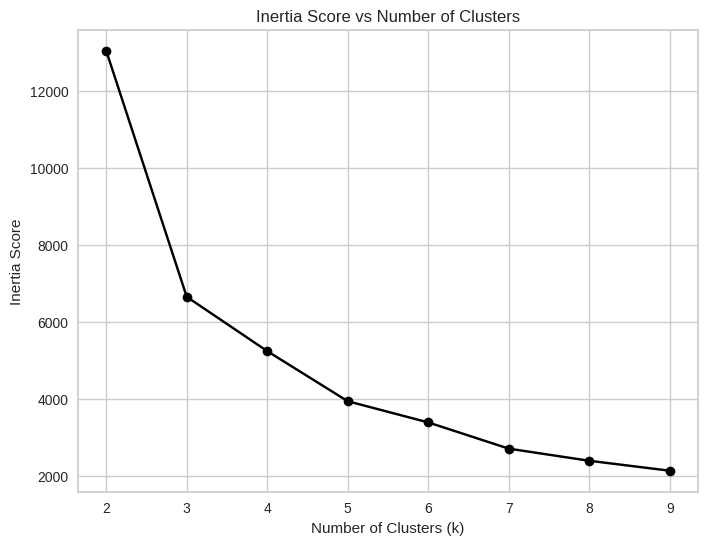

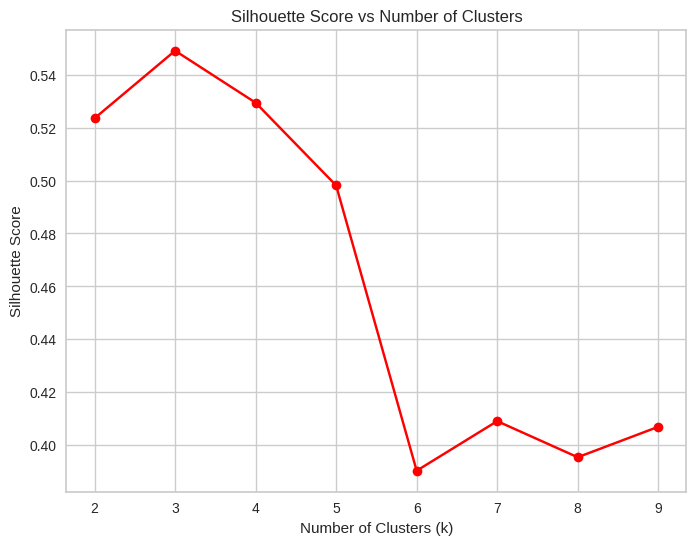

In [ ]:
# Initialize empty lists for storing inertia scores
inertia = []

# Iterate over a range of cluster numbers from 2 to 9
for k in range(2, 10):
    # Initialize a KMeans object with 'k' clusters
    kmeans = KMeans(n_clusters=k, random_state=12, n_init=10)
    # Fit the KMeans model to the PCA-transformed data
    kmeans.fit(dfg_pca)
    # Append the inertia of the model to the 'inertia' list
    inertia.append(kmeans.inertia_)

# Plot the inertia scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), inertia, marker="o", color="black")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia Score")
plt.title("Inertia Score vs Number of Clusters")
plt.grid(True)
plt.show()


# Initialize empty list for storing silhouette scores
silhouette = []

# Iterate over a range of cluster numbers from 2 to 9
for k in range(2, 10):
    # Initialize a KMeans object with 'k' clusters
    kmeans = KMeans(n_clusters=k, random_state=12, n_init=10)
    # Fit the KMeans model to the PCA-transformed data
    kmeans.fit(dfg_pca)
    # Get the cluster labels predicted by the model
    cluster_label = kmeans.labels_
    # Calculate the silhouette score of the model and append it to the 'silhouette' list
    silhouette.append(silhouette_score(dfg_pca, cluster_label))

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), silhouette, marker="o", color="red")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.grid(True)
plt.show()

Based on the information provided in the images, here is a summary of the relationship between the number of clusters and the silhouette score as well as the inertia score:
1. Silhouette Score:
    As the number of clusters increases, the silhouette score generally decreases. This is because with more clusters, it becomes more difficult to find a clear separation between the clusters, leading to lower silhouette scores. The silhouette score is often used to determine the optimal number of clusters, as a higher score indicates better cluster separation and assignment.

2. Inertia Score:
    As the number of clusters increases, the inertia score generally decreases. This is because with more clusters, the data points are more tightly grouped within each cluster, leading to a lower inertia score. The inertia score is often used in conjunction with the silhouette score to determine the optimal number of clusters, as a balance between cluster separation and compactness is desirable.

The optimal number of clusters is typically found by examining the "elbow" or "knee" in the plots of the silhouette score and inertia score against the number of clusters. This point often represents a good trade-off between the two metrics and can indicate the appropriate number of clusters for the dataset.


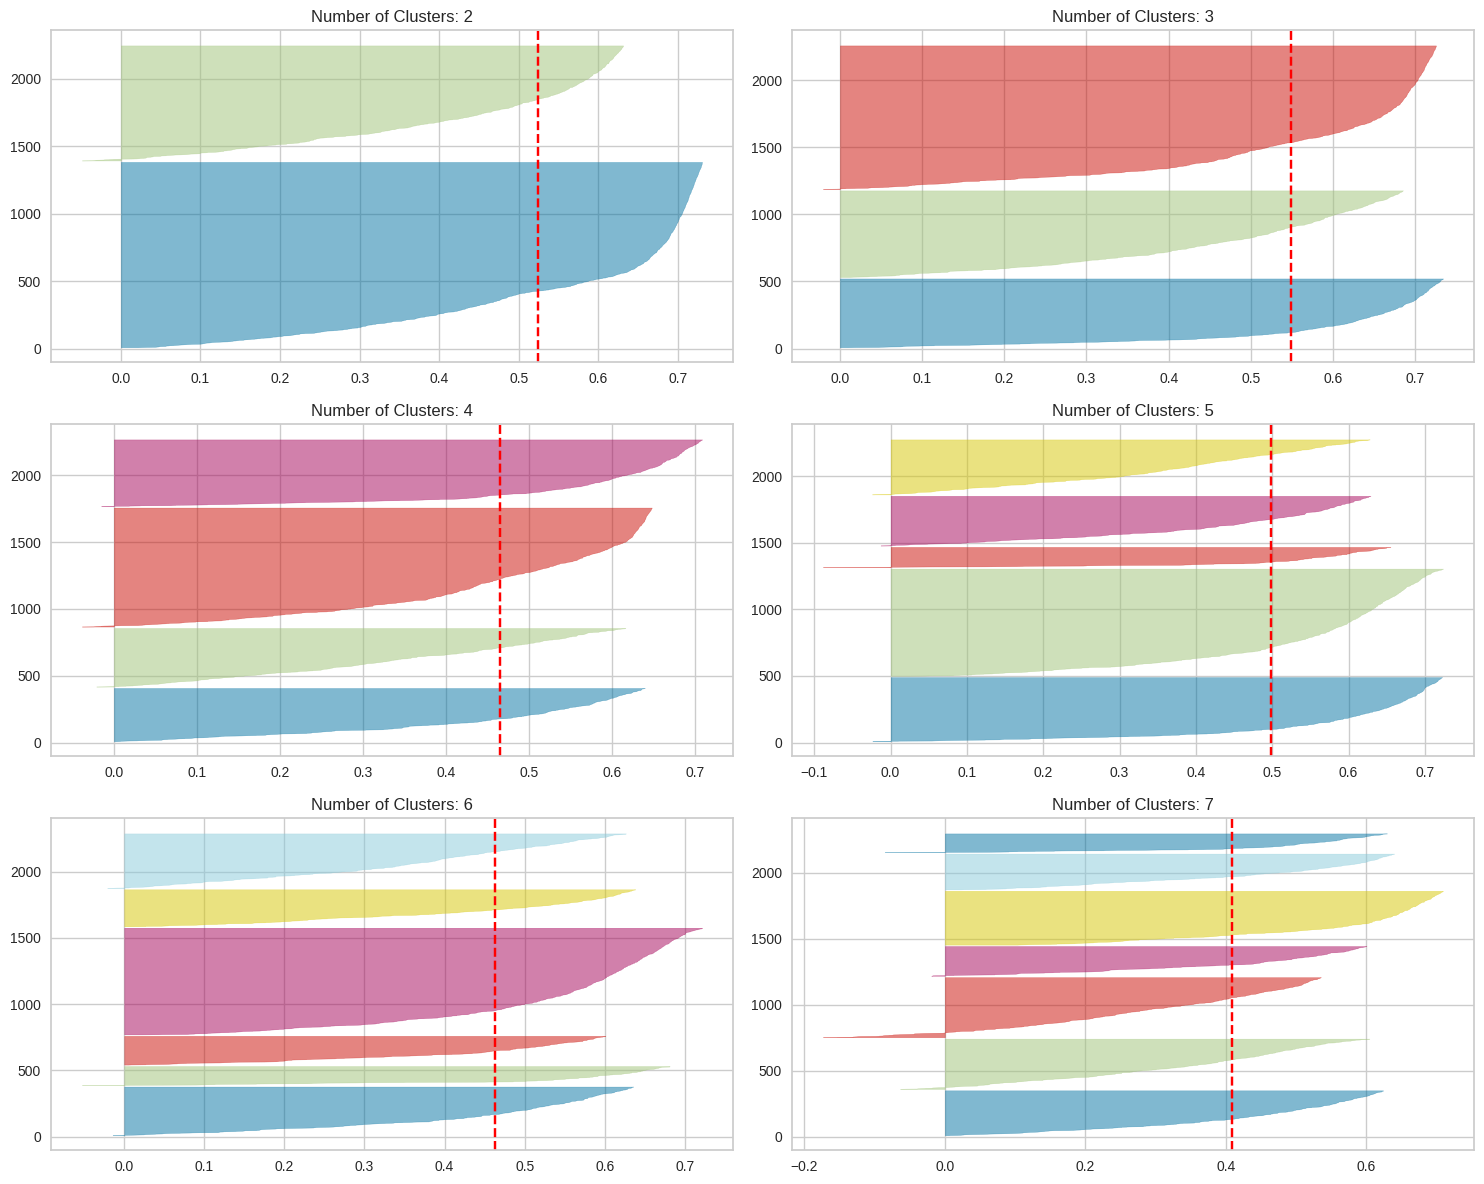

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Prepare the figure with subplots
fig, ax = plt.subplots(3, 2, figsize=(15, 12))
ax = ax.ravel()  # Flatten the array of axes

# Define the range of cluster numbers
cluster_range = range(2, 8)

# Loop through the range of cluster numbers
for i, n_clusters in enumerate(cluster_range):
    # Create KMeans instance with the current number of clusters
    km = KMeans(n_clusters=n_clusters, init='random', n_init=10, max_iter=100, random_state=42)

    # Create the SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[i])

    # Fit the visualizer with the PCA-transformed data (dfg_pca)
    visualizer.fit(dfg_pca)

    # Set the title for each subplot
    ax[i].set_title(f'Number of Clusters: {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

Based on the images, the key observations about the relationship between the number of clusters and the silhouette score, as well as the inertia score, are:
1. As the number of clusters increases, the silhouette score generally decreases. This indicates that having fewer clusters may result in better cluster separation and assignment.
2. The inertia score (within-cluster sum of squares) decreases as the number of clusters increases. This suggests that having more clusters leads to more compact clusters with lower intracluster variance.
2. There appears to be a noticeable change or "elbow" in the silhouette score and inertia score plots around 4 clusters, indicating that this may be a suitable choice for the optimal number of clusters.
4. Beyond 4 clusters, the improvements in the silhouette score and inertia score become less significant, suggesting diminishing returns in increasing the number of clusters further.

In summary, the data suggests that using 4 clusters may provide a good balance between cluster separation (silhouette score) and cluster compactness (inertia score), making it a reasonable choice for the optimal number of clusters in this dataset.

### Clustering K means

In [ ]:
# Initialize and fit KMeans model
kmeans = KMeans(n_clusters=4, random_state=120, n_init='auto')
kmeans.fit(dfg_pca.values)

# Add cluster labels to dfg_pca DataFrame
dfg_pca['Cluster'] = kmeans.labels_

# Example renaming of PCA columns after transformation
dfg_pca.rename(columns={0: "PC1", 1: "PC2"}, inplace=True)

# Display a sample of 5 rows from dfg_pca with cluster column
display(dfg_pca.sample(5))

,PC1,PC2,Cluster
747,4.671749,-2.170021,2
896,2.027444,1.416857,0
1719,1.866529,2.470613,0
2003,-1.702682,-3.924958,3
930,3.621656,-1.266322,2


In [ ]:
dfg_pca

,PC1,PC2,Cluster
0,5.163756,-0.419055,2
1,-3.352968,-0.216747,1
2,2.807292,-0.828384,2
3,-3.166916,-1.194740,3
4,-0.692028,0.935089,1
...,...,...,...
2235,1.941718,2.160846,0
2236,-1.367748,3.562210,0
2237,2.515565,-1.100125,2
2238,1.908884,1.993514,0


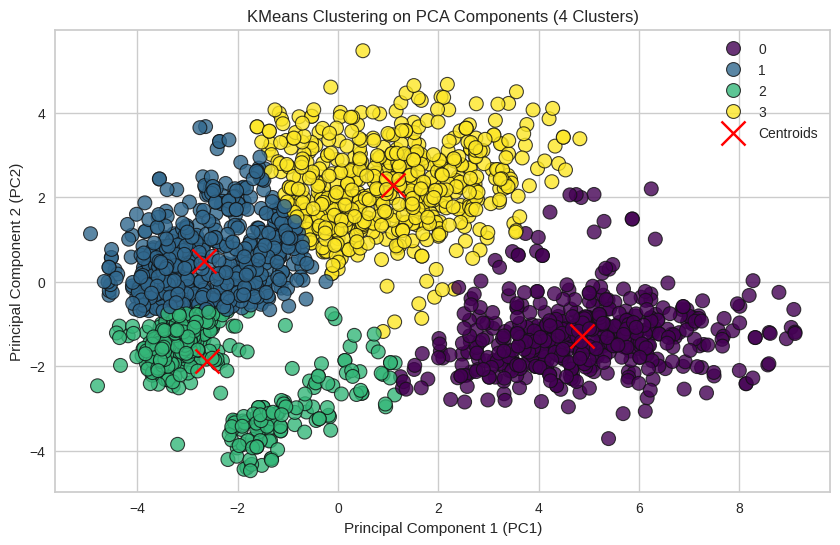

In [ ]:
# Initialize and fit KMeans model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=123)
kmeans.fit(dfg_pca.values)

# Add cluster labels to dfg_pca DataFrame
dfg_pca['cluster'] = kmeans.labels_

# Example renaming of PCA columns after transformation
dfg_pca.rename(columns={0: "PC1", 1: "PC2"}, inplace=True)

# Plotting the clusters
plt.figure(figsize=(10, 6))

# Create scatter plot for each cluster
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=dfg_pca, palette='viridis', s=100, alpha=0.8, edgecolor='k')

# Plotting centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=300, c='red', label='Centroids')

# Adding plot labels and title
plt.title('KMeans Clustering on PCA Components (4 Clusters)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

The K-Means clustering analysis on the PCA components has revealed a well-structured partitioning of the data into 4 distinct clusters. The clusters exhibit clear separation and differences in their compactness, suggesting the algorithm has effectively captured the inherent groupings within the dataset. This analysis offers valuable insights into the underlying patterns and relationships in the data, providing a solid foundation for further investigation and exploration.

## Task 4 : Customer Personality Analysis for Marketing Retargeting
Work Stages:

1. Interpreting the Clustering Results from Each Used Feature
2. Selecting Clusters for Marketing Retargeting
3. Calculating the Potential Impact of Marketing Retargeting Results from Identified Clusters

In [ ]:
dfg_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2229 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2229 non-null   int64  
 1   Income               2229 non-null   float64
 2   Kidhome              2229 non-null   int64  
 3   Teenhome             2229 non-null   int64  
 4   Recency              2229 non-null   int64  
 5   MntCoke              2229 non-null   int64  
 6   MntFruits            2229 non-null   int64  
 7   MntMeatProducts      2229 non-null   float64
 8   MntFishProducts      2229 non-null   int64  
 9   MntSweetProducts     2229 non-null   float64
 10  MntGoldProds         2229 non-null   float64
 11  NumDealsPurchases    2229 non-null   float64
 12  NumWebPurchases      2229 non-null   float64
 13  NumCatalogPurchases  2229 non-null   float64
 14  NumStorePurchases    2229 non-null   int64  
 15  NumWebVisitsMonth    2229 non-null   float6

In [ ]:
# Create a copy of the dataframe dfg_mod
dfg_mod_cluster = dfg_mod.copy()

# Add the cluster labels from dfg_pca to dfg_mod_cluster
dfg_mod_cluster['Cluster'] = dfg_pca['Cluster']

# Display the updated dataframe with cluster labels
dfg_mod_cluster.head()

,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,ConversionRate,Marital_Bertunangan,Marital_Cerai,Marital_Duda,Marital_Janda,Marital_Lajang,Marital_Menikah,HasParent_no,HasParent_yes,Cluster
0,1,58138000.0,0,0,58,635000,88000,546000.0,172000,81000.0,...,1.142857,0,0,0,0,1,0,1,0,2
1,1,46344000.0,1,1,38,11000,1000,6000.0,2000,1000.0,...,0.200000,0,0,0,0,1,0,0,1,1
2,1,71613000.0,0,0,26,426000,49000,127000.0,111000,21000.0,...,2.000000,1,0,0,0,0,0,1,0,2
3,1,26646000.0,1,0,26,11000,4000,20000.0,10000,3000.0,...,0.333333,1,0,0,0,0,0,0,1,3
4,3,58293000.0,1,0,94,173000,43000,118000.0,46000,27000.0,...,1.000000,0,0,0,0,0,1,0,1,1


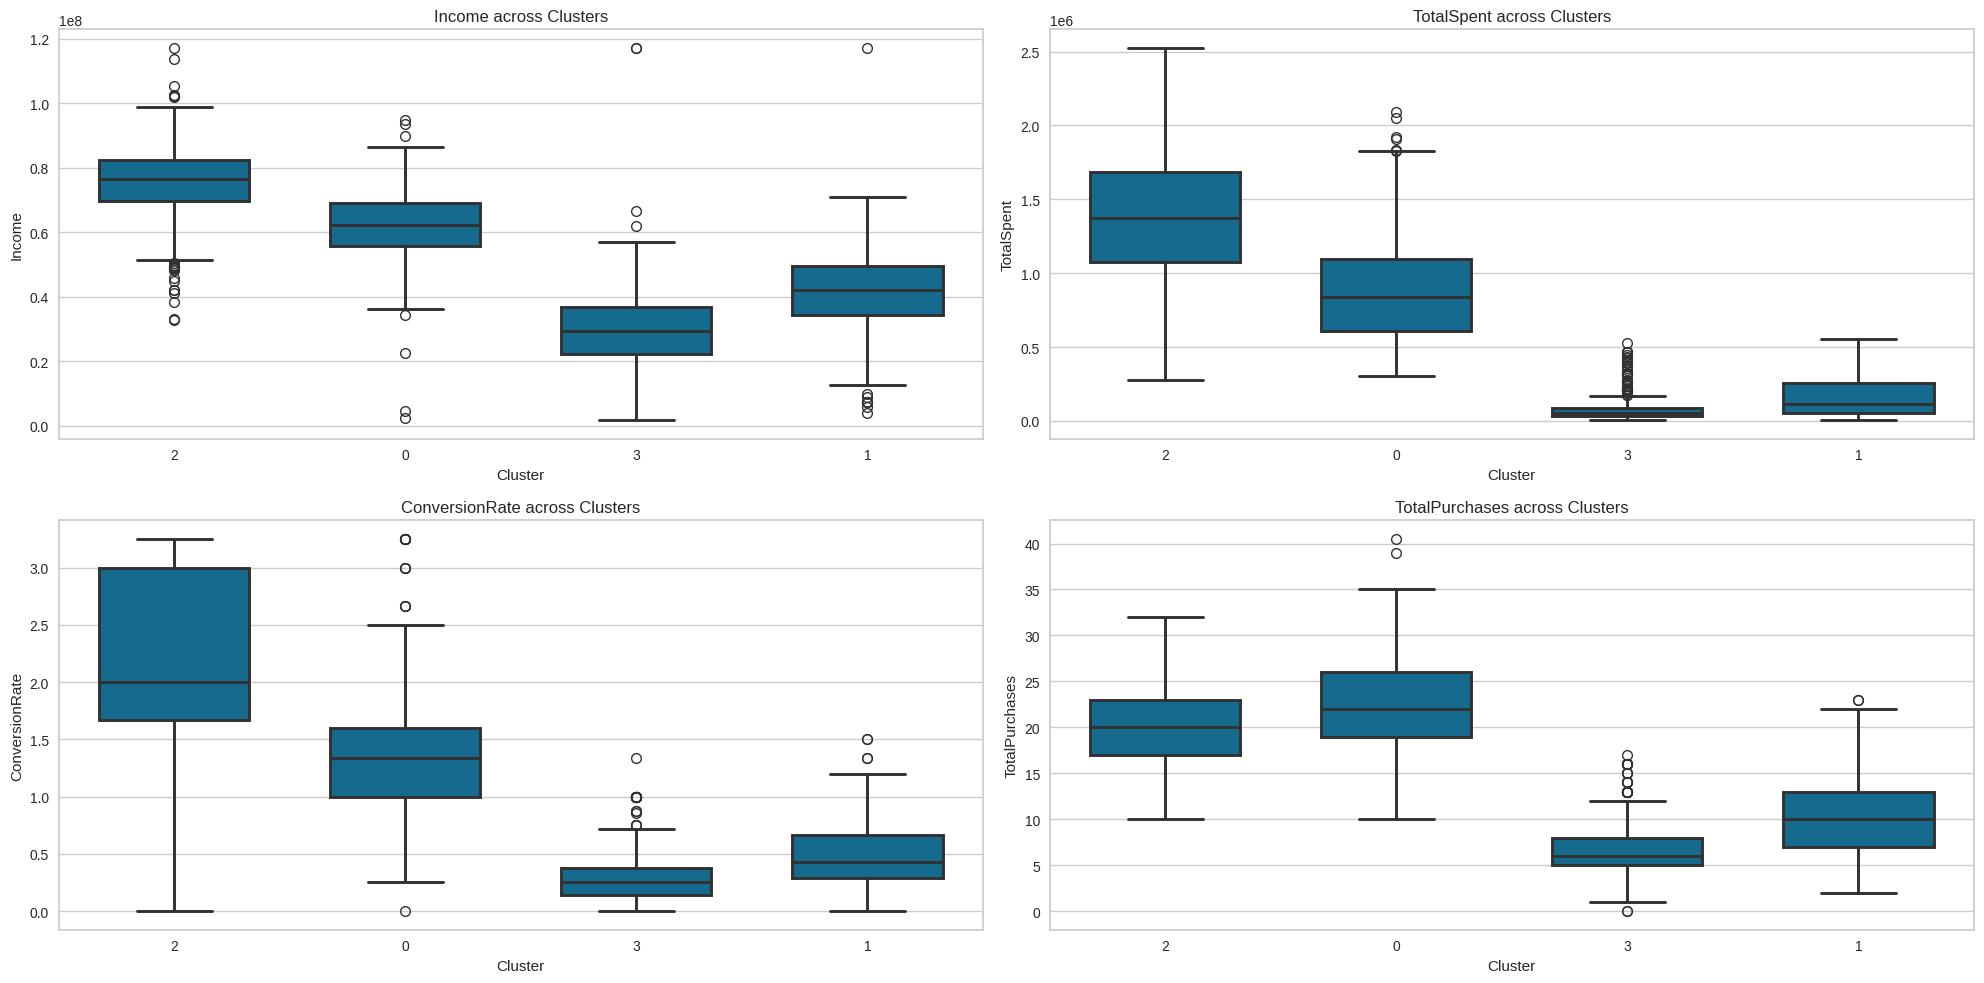

In [ ]:
import warnings
warnings.filterwarnings('ignore')


# Define a list of metrics for box plots
metrics = ['Income', 'TotalSpent', 'ConversionRate', 'TotalPurchases', 'Cluster']

# Remove 'Cluster' from metrics to avoid plotting it
metrics.remove('Cluster')

# Calculate the number of rows needed for the subplots
n = len(metrics)
ncols = 2
nrows = (n + 1) // ncols  # Calculate number of rows dynamically based on the number of metrics

# Create a figure and a grid of subplots
fig, ax = plt.subplots(nrows, ncols, figsize=(20, nrows * 5))
ax = ax.flatten()

# Define the order of clusters for display in the box plots
order_clus = [2, 0, 3, 1]  # Adjust order as per your clustering labels

# Create subplots for each feature
for i, feature in enumerate(metrics):
    # Create a box plot for the current feature
    sns.boxplot(data=dfg_mod_cluster, y=feature, x='Cluster', order=order_clus, ax=ax[i], linewidth=2.1, width=0.65)
    ax[i].set_title(f'{feature} across Clusters')
    ax[i].set_xlabel('Cluster')
    ax[i].set_ylabel(feature)
    ax[i].legend().remove()  # Remove legend to avoid duplication

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Create a copy of the dataframe 'dfg_mod_cluster' and store it in 'interpretation'
interpretation_dfg = dfg_mod_cluster.copy()

# Rename cluster values to more descriptive labels
interpretation_dfg['Cluster'] = interpretation_dfg['Cluster'].map({
    2: 'High Spender',
    0: 'Mid Spender',
    3: 'Low Spender',
    1: 'Risk Churn'
})

# Rename the columns to more descriptive labels if needed
rename_cols = {
    'MntCoke': 'CokeProducts',
    'MntFruits': 'FruitsProducts',
    'MntMeatProducts': 'MeatProducts',
    'MntFishProducts': 'FishProducts',
    'MntSweetProducts': 'SweetProducts',
    'MntGoldProds': 'GoldProducts'
}

interpretation_dfg.rename(columns=rename_cols, inplace=True)

# Define the columns for metrics interpretation
metrics_interpretation = [
    'ConversionRate',
    'TotalSpent',
    'Income',
    'TotalPurchases',
    'TotalAccCmp',
    'GoldProducts',
    'SweetProducts',
    'CokeProducts',
    'FruitsProducts',
    'MeatProducts'
]

# Display numbers in a more readable format
pd.options.display.float_format = '{:,.2f}'.format

# Display the total sum of each metric for each customer segment
sum_metrics = interpretation_dfg.groupby('Cluster')[metrics_interpretation].sum().sort_values('TotalSpent', ascending=False).astype(float).reset_index()
print('Total Sum of Metrics by Cluster:\n')
display(sum_metrics)

# Display the average value of each metric for each customer segment
average_metrics = interpretation_dfg.groupby('Cluster')[metrics_interpretation].mean().sort_values('TotalSpent', ascending=False).astype(float).reset_index()
print('\n\Mean of Metrics by Cluster:\n')
display(average_metrics)

# Display the maximum value of each metric for each customer segment
max_metrics = interpretation_dfg.groupby('Cluster')[metrics_interpretation].max().sort_values('TotalSpent', ascending=False).astype(float).reset_index()
print('\nnMaximum Metrics by Cluster :\n')
display(max_metrics)


Total Sum of Metrics by Cluster:



,Cluster,ConversionRate,TotalSpent,Income,TotalPurchases,TotalAccCmp,GoldProducts,SweetProducts,CokeProducts,FruitsProducts,MeatProducts
0,High Spender,"1,087.35","698,502,000.00","38,001,488,000.00","10,172.00",405.00,"32,557,500.00","25,306,000.00","314,199,000.00","32,244,000.00","201,687,000.00"
1,Mid Spender,754.89,"502,205,000.00","35,126,021,500.00","12,697.50",164.00,"34,878,000.00","17,107,000.00","296,391,000.00","19,777,000.00","98,574,000.00"
2,Risk Churn,311.08,"102,901,000.00","26,751,250,500.00","6,754.00",53.00,"12,620,500.00","3,522,000.00","54,955,000.00","3,498,000.00","22,972,000.00"
3,Low Spender,152.05,"42,039,000.00","15,347,861,500.00","3,461.00",44.00,"7,993,500.00","3,017,000.00","12,794,000.00","3,026,000.00","10,187,000.00"



\Mean of Metrics by Cluster:



,Cluster,ConversionRate,TotalSpent,Income,TotalPurchases,TotalAccCmp,GoldProducts,SweetProducts,CokeProducts,FruitsProducts,MeatProducts
0,High Spender,2.17,"1,391,438.25","75,700,175.30",20.26,0.81,"64,855.58","50,410.36","625,894.42","64,231.08","401,766.93"
1,Mid Spender,1.33,"887,287.99","62,060,108.66",22.43,0.29,"61,621.91","30,224.38","523,659.01","34,941.70","174,159.01"
2,Risk Churn,0.48,"159,043.28","41,346,600.46",10.44,0.08,"19,506.18","5,443.59","84,938.18","5,406.49","35,505.41"
3,Low Spender,0.30,"81,787.94","29,859,652.72",6.73,0.09,"15,551.56","5,869.65","24,891.05","5,887.16","19,819.07"



nMaximum Metrics by Cluster :



,Cluster,ConversionRate,TotalSpent,Income,TotalPurchases,TotalAccCmp,GoldProducts,SweetProducts,CokeProducts,FruitsProducts,MeatProducts
0,High Spender,3.25,"2,525,000.00","117,133,500.00",32.00,4.00,"126,500.00","81,000.00","1,493,000.00","197,000.00","551,000.00"
1,Mid Spender,3.25,"2,092,000.00","94,871,000.00",40.50,3.00,"126,500.00","81,000.00","1,486,000.00","199,000.00","551,000.00"
2,Risk Churn,1.50,"551,000.00","117,133,500.00",23.00,2.00,"126,500.00","78,000.00","378,000.00","65,000.00","206,000.00"
3,Low Spender,1.33,"529,000.00","117,133,500.00",17.00,2.00,"126,500.00","62,000.00","338,000.00","87,000.00","217,000.00"


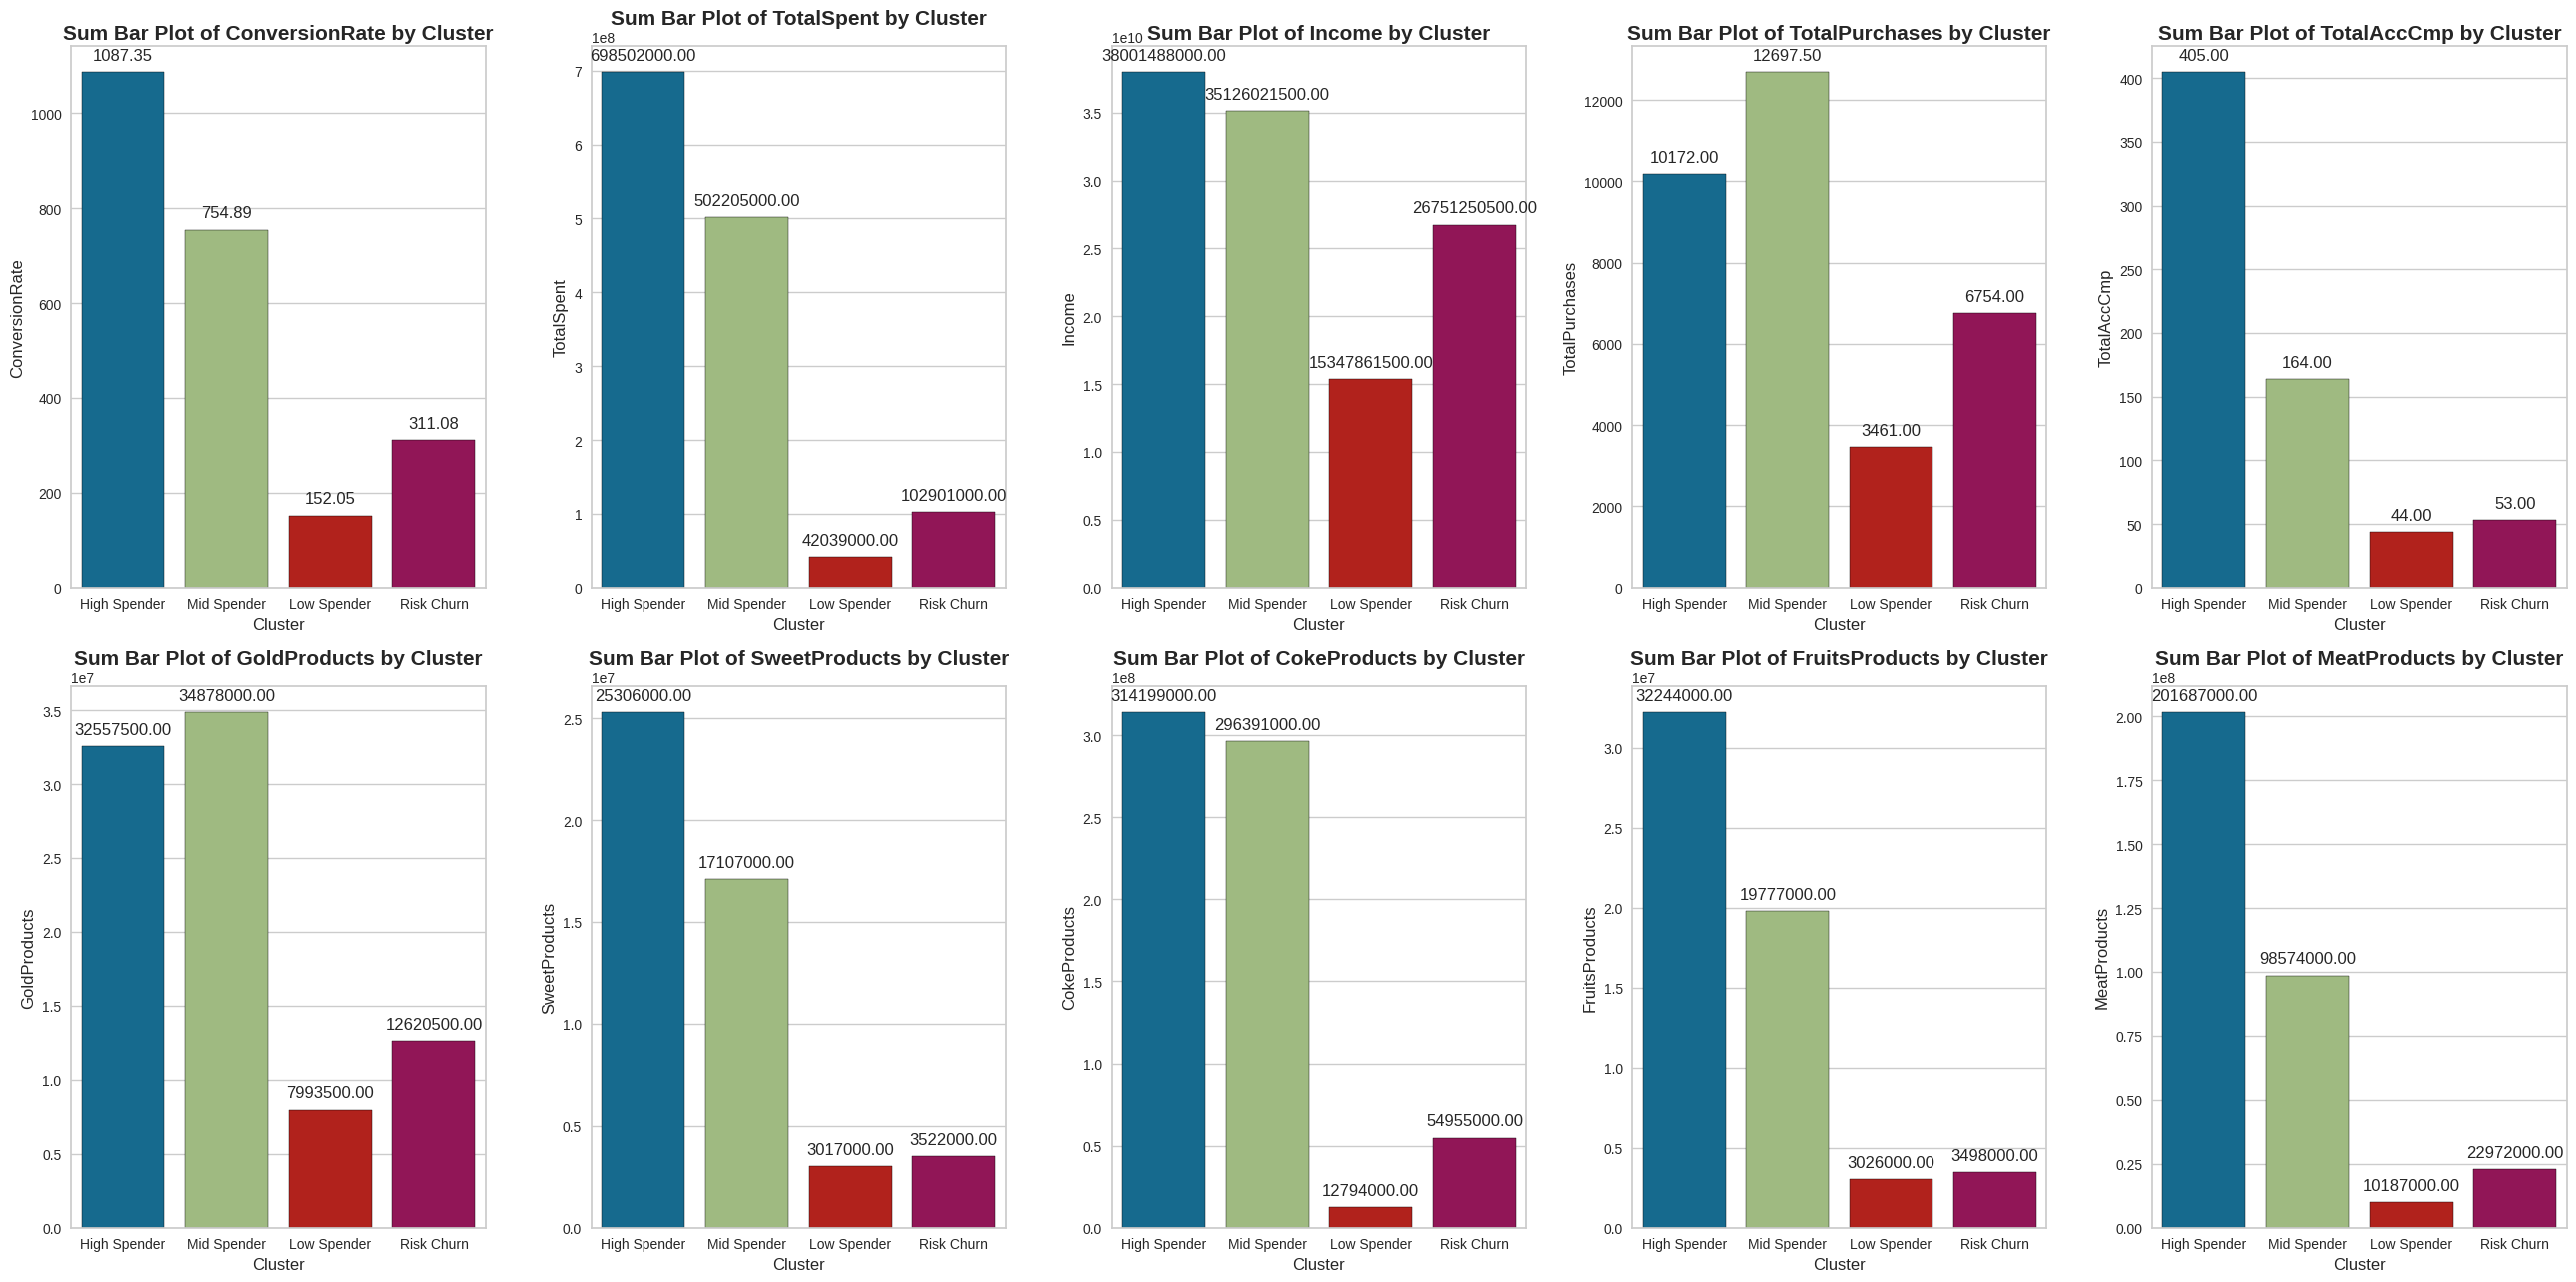

In [ ]:
# Define order of segments
order_segments = ['High Spender', 'Mid Spender', 'Low Spender', 'Risk Churn']

# Create figure and axes for subplots
fig, ax = plt.subplots(2, 5, figsize=(26, 13))

# Loop over each feature and create a bar plot on a separate subplot
for feature, ax in zip(metrics_interpretation, ax.flatten()):
    # Create a bar plot for the current feature
    barplot = sns.barplot(data=sum_metrics, x='Cluster', y=feature, ax=ax, hue='Cluster', order=order_segments, hue_order=order_segments, errorbar=None, edgecolor='black')
    ax.set_title(f'Sum Bar Plot of {feature} by Cluster', fontsize=15, fontweight='bold', pad=5)
    ax.set_xlabel('Cluster', fontsize=12)
    ax.set_ylabel(feature, fontsize=12)

    # Add number annotations inside the bars
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.2f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center',
                         xytext=(0, 12),
                         textcoords='offset points')

plt.tight_layout()
plt.show()

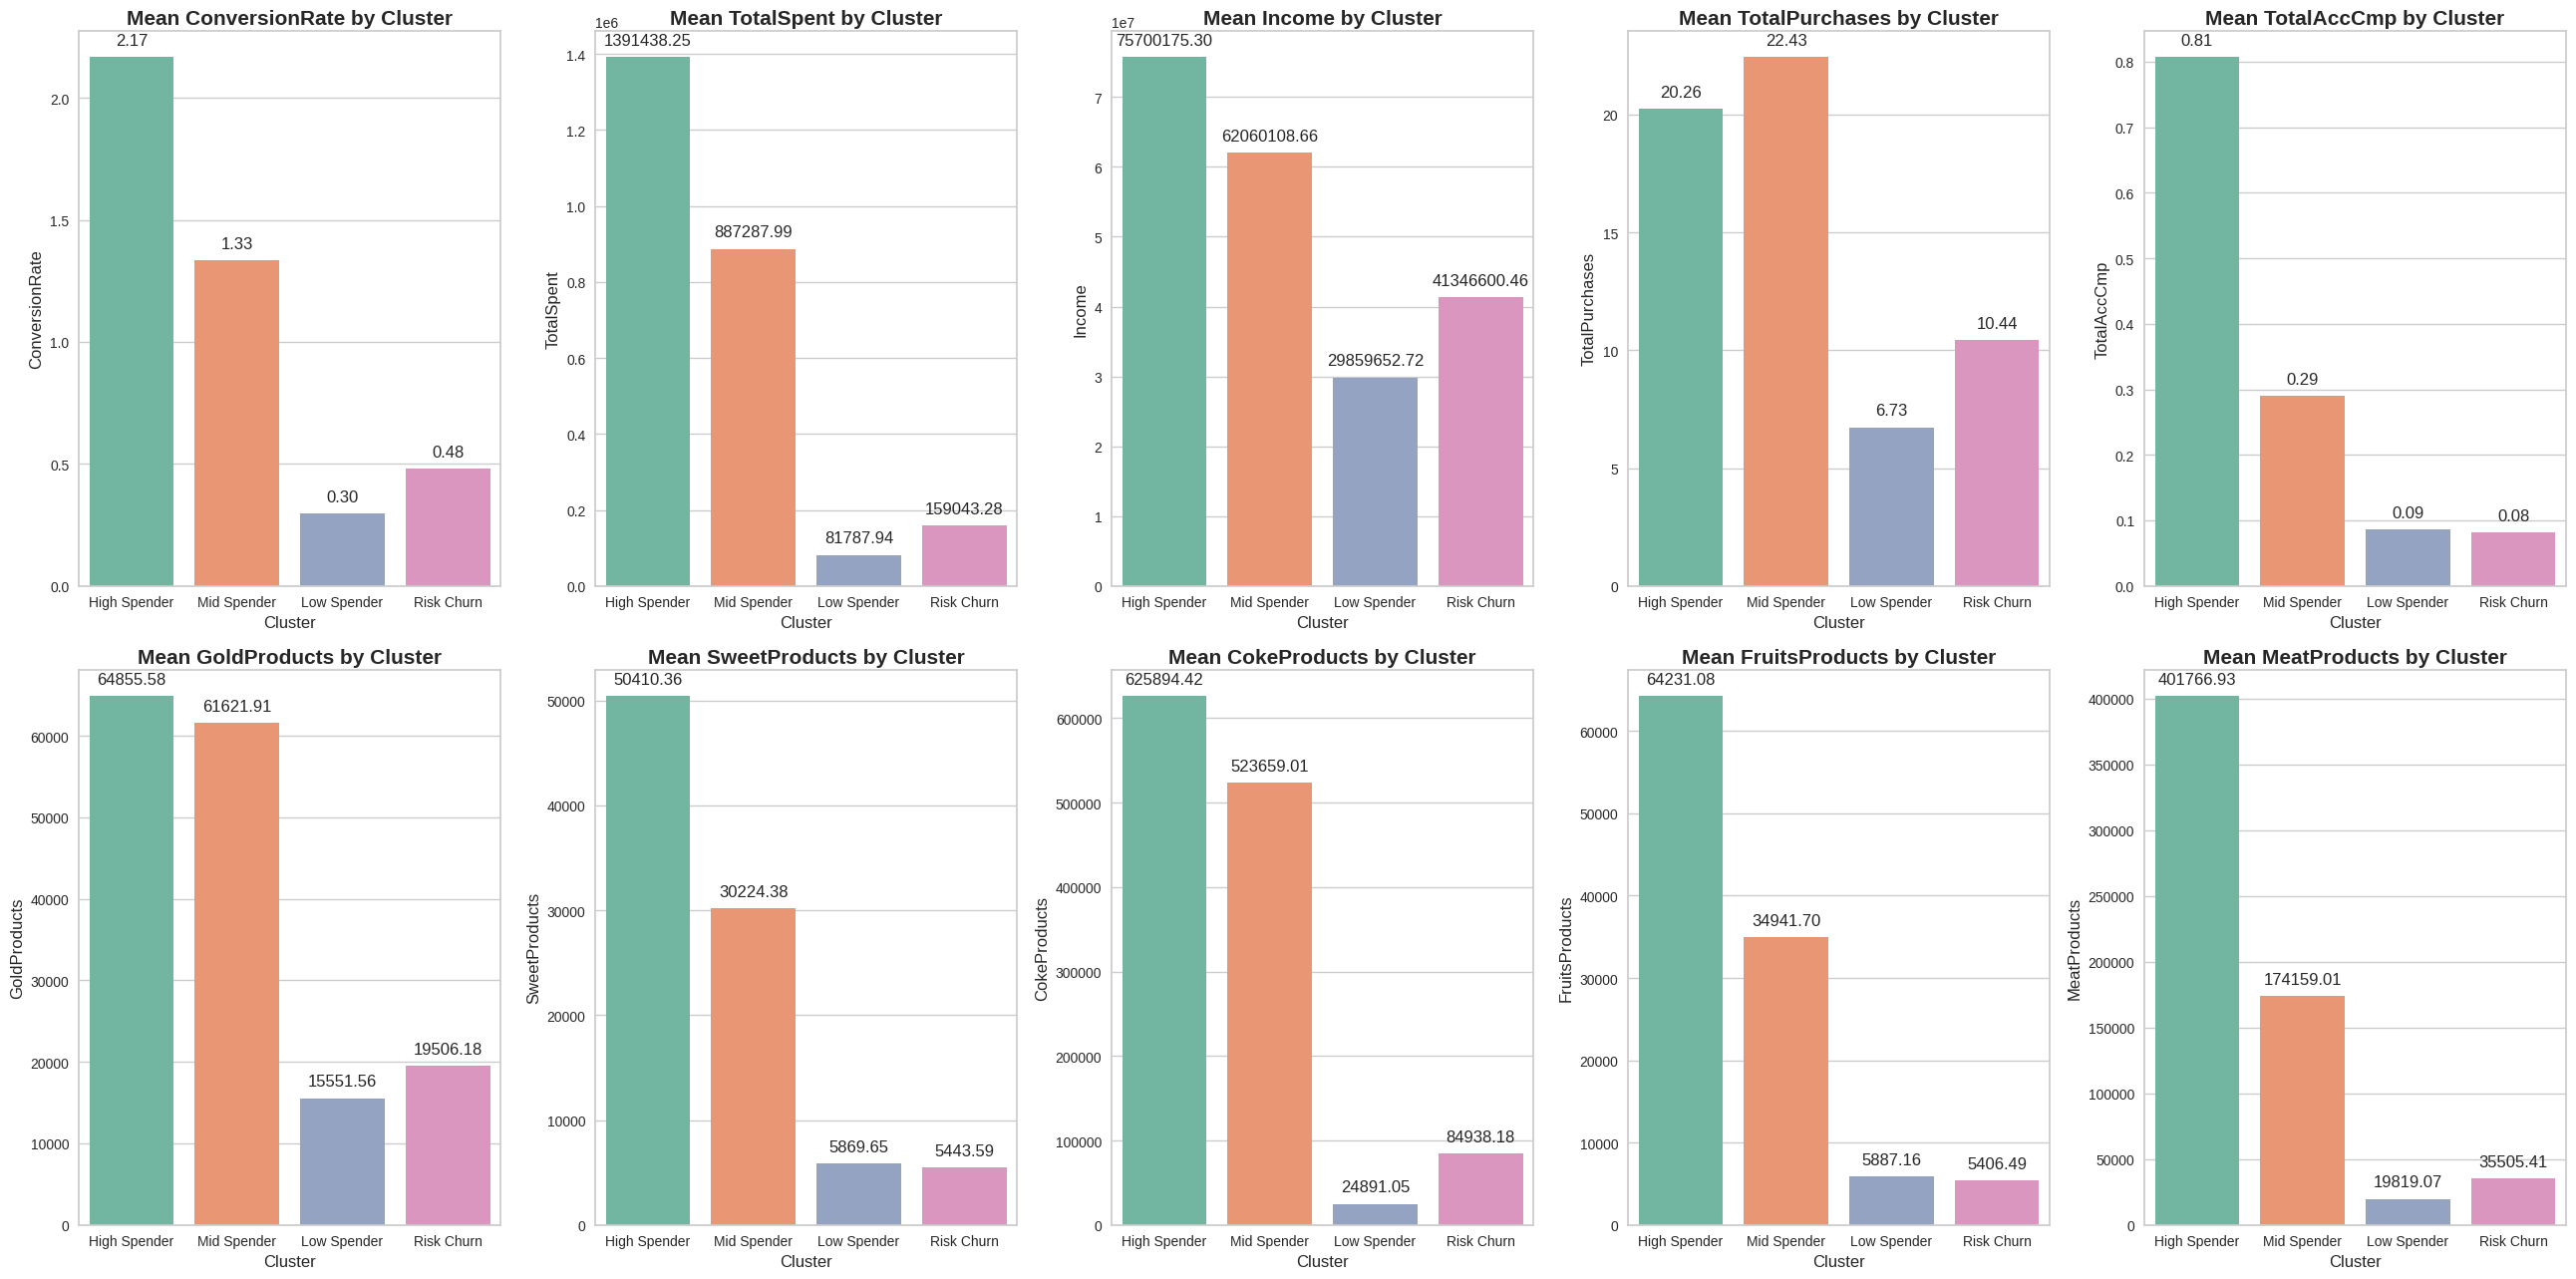

In [ ]:
import warnings
warnings.filterwarnings('ignore')

order_segments = ['High Spender', 'Mid Spender', 'Low Spender', 'Risk Churn']

# Create figure and axes for subplots
fig, ax = plt.subplots(2, 5, figsize=(26, 13))

# Loop over each feature and create a bar plot on a separate subplot
for feature, ax in zip(metrics_interpretation, ax.flatten()):
    # Calculate mean of the current feature by cluster
    mean_metrics = interpretation_dfg.groupby('Cluster')[feature].mean().reset_index()

    # Create a bar plot for the current feature using mean_metrics dataframe
    barplot = sns.barplot(data=mean_metrics, x='Cluster', y=feature, ax=ax, order=order_segments, palette='Set2')
    ax.set_title(f'Mean {feature} by Cluster', fontsize=15, fontweight='bold', pad=5)
    ax.set_xlabel('Cluster', fontsize=12)
    ax.set_ylabel(feature, fontsize=12)

    # Add number annotations inside the bars
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.2f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center',
                         xytext=(0, 12),
                         textcoords='offset points')

plt.tight_layout()
plt.show()

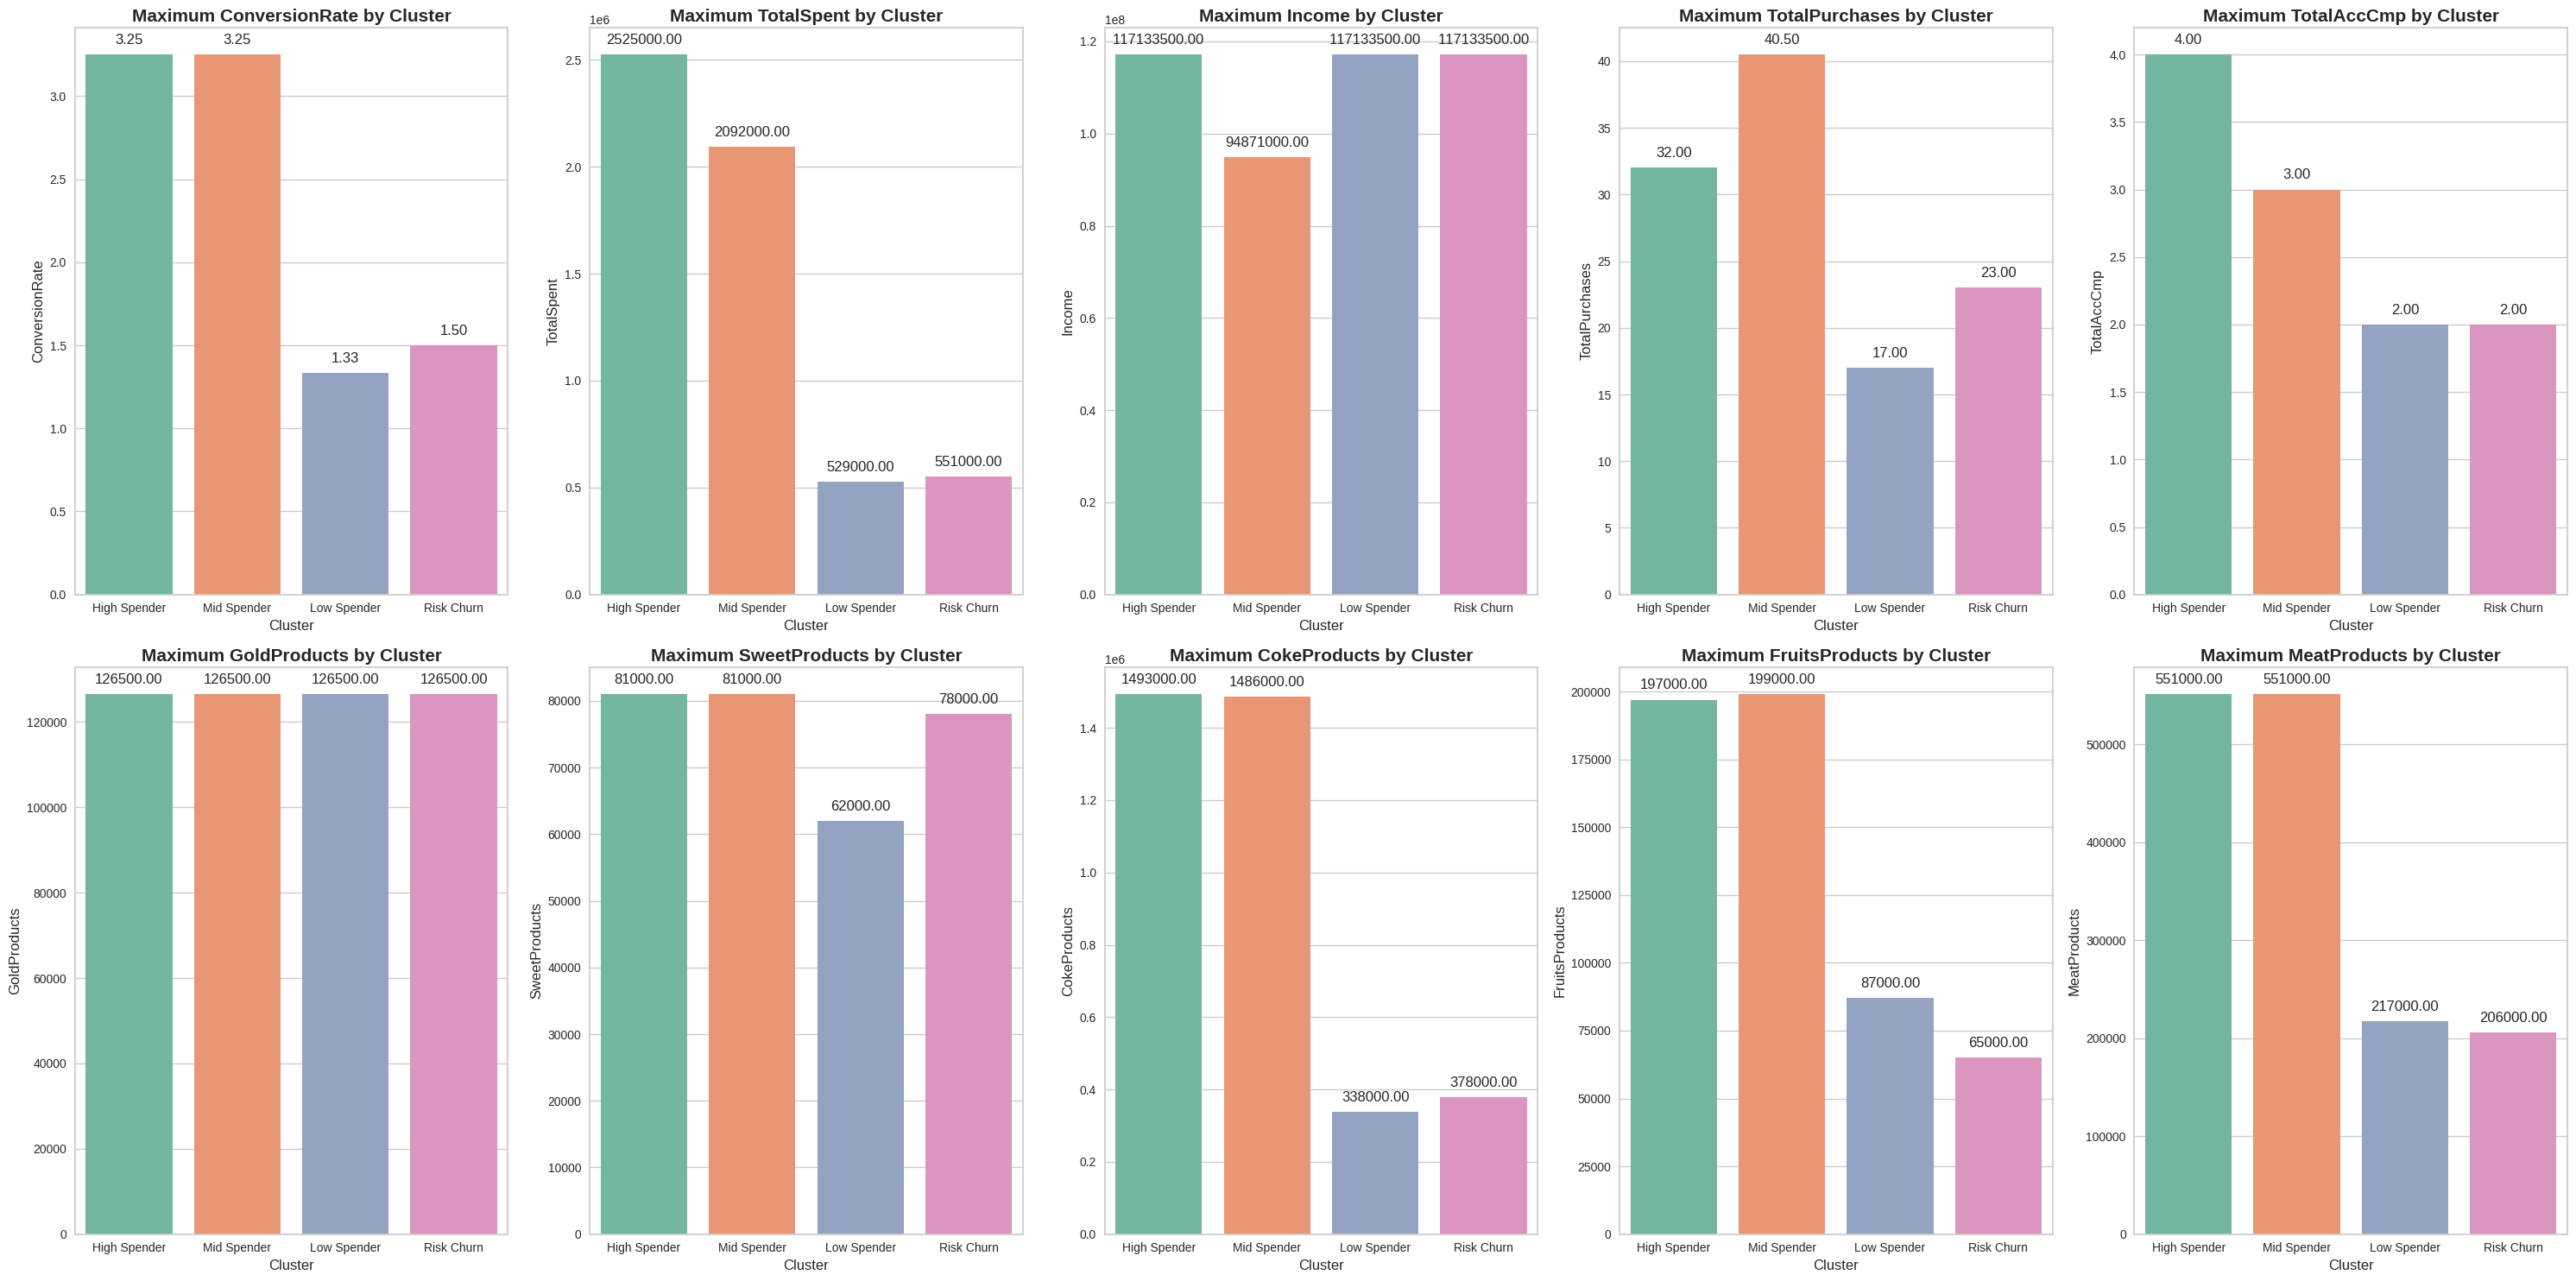

In [ ]:
# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# Define order of segments
order_segments = ['High Spender', 'Mid Spender', 'Low Spender', 'Risk Churn']

# Create figure and axes for subplots
fig, ax = plt.subplots(2, 5, figsize=(30, 15))

# Loop over each feature and create a bar plot on a separate subplot
for feature, ax in zip(metrics_interpretation, ax.flatten()):
    # Calculate maximum of the current feature by cluster
    max_metrics = interpretation_dfg.groupby('Cluster')[feature].max().reset_index()

    # Create a bar plot for the current feature using max_metrics dataframe
    barplot = sns.barplot(data=max_metrics, x='Cluster', y=feature, ax=ax, order=order_segments, palette='Set2')
    ax.set_title(f'Maximum {feature} by Cluster', fontsize=15, fontweight='bold', pad=5)
    ax.set_xlabel('Cluster', fontsize=12)
    ax.set_ylabel(feature, fontsize=12)

    # Add number annotations inside the bars
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.2f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center',
                         xytext=(0, 12),
                         textcoords='offset points')

plt.tight_layout()
plt.show()

Cluster Interpretation and Marketing Recommendations

1. High Spender:
    
    The High Spender cluster is characterized by the highest sum total spending of $698,502,000.00, an average conversion rate of 2.17, and an average income of $75,700,175.30. This cluster consists of customers who spend the most on the platform, demonstrating a high conversion rate and substantial purchases during their infrequent visits. Their high income supports their spending behavior, focusing on premium products.

    Marketing Recommendation:
    *   Personalize retargeting campaigns based on previous purchases.
    *   Emphasize exclusive offers on premium products.
    *   Utilize high-income targeting for promotions and loyalty programs to increase spending.

2. Mid Spender:
    
    The Mid Spender cluster has a sum total spending of $502,205,000.00, an average conversion rate of 1.33, and an average income of $62,060,108.66. These customers have the highest average total transaction of 22.43 and, like the high spenders, focus on premium products. This group shows a moderate level of spending and income, with a good conversion rate. Their average total transaction is higher than that of the High Spender cluster, indicating frequent and significant purchases.
    
    Marketing Recommendation:
    *   Implement retargeting strategies to promote a broader range of products.
    *   Introduce loyalty programs to encourage more frequent visits and higher spending.

3. Low Spender:
    
    The Low Spender cluster has a sum total spending of $42,039,000.00, an average conversion rate of 0.30, and an average income of $29,859,652.72. These customers have lower conversion rates and spending levels compared to other clusters, with an average total transaction of 6.73. This cluster represents customers with lower conversion rates and spending levels. Despite their relatively high income, their spending behavior suggests potential for increased engagement.
    
    Marketing Recommendation:
    *   Implement targeted promotions for a wider range of products.
    *   Launch special offers and discounts to attract this segment and increase their frequency of visits.

4. Risk Churn:
    
    The Risk Churn cluster is characterized by the lowest sum total spending of $102,901,000.00, the lowest average conversion rate of 0.48, and an average income of $41,346,600.46. These customers often visit the platform but do not complete transactions. They primarily spend on Coke, meat, and gold products. Customers in this cluster have low conversion rates and spending, with a potential risk of churn. They often visit the platform without completing transactions, indicating a need for retention strategies.
    
    Marketing Recommendation:
    To prevent churn and increase re-engagement, it is recommended to implement aggressive retargeting campaigns with personalized incentives. Focus on customer satisfaction initiatives and exclusive offers are also crucial to win back and retain these customers.

Overall Leverage data to identify cross-sell opportunities within each cluster, encouraging customers to explore additional product categories. Implement dynamic pricing strategies based on customer behavior and purchase history to optimize revenue from each cluster. Regularly review and refine customer segmentation to adapt to changing market dynamics and customer preferences. Continue investing in advanced analytics to uncover deeper insights and refine marketing strategies based on evolving customer behaviors.